### Importing necessary noUDF

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier

import numpy as np
import os
import sys

### Defining the path to necessary packages.

In [2]:
module_path = os.path.join(os.path.dirname( os.getcwd())) #Find the directory where we can find the 'Modules' library.
sys.path.append(module_path)

from Modules.Classes import MultiOutputLinearRegression, ModelComparator


### Defining constants for the models.

In [3]:
#The datatype of each feature of the dataframe.
dtypes = { "Make": "string", 
            "Model":"string",
            "Vehicle Class":"string",
            "Engine Size(L)":np.float64,
            "Cylinders":"string",
            "Transmission":"string",
            "Fuel Type":"string",
            "Fuel Consumption City (L/100 km)":np.float64,
            "Fuel Consumption Hwy (L/100 km)":np.float64,
            "Fuel Consumption Comb (L/100 km)":np.float64,
            "Fuel Consumption Comb (mpg)":np.float64,
            "CO2 Emissions(g/km)":np.float64}


# Define the dictionary of  ML models we will be training.
Models = {
    "DecisionTree": DecisionTreeClassifier(criterion="gini", splitter="best", min_samples_split=2), 
    "RandomForest": RandomForestClassifier(n_estimators=15, criterion='gini'), 
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "LogReg": LogisticRegression(max_iter = 200,),
   "LinReg":MultiOutputLinearRegression(LinearRegression())
}    

#For each ML model create it's corresponding parameter space.
Models_hipparams = {"DecisionTree":{"criterion":['gini','entropy'],
                                       "splitter":['best','random'],
                                       "min_samples_split":[2,3],
                                        "min_samples_leaf":[2,3]},

                    "RandomForest":{"n_estimators":list(range(5, 25, 5)),
                                        "min_samples_split":[2,3],
                                       "min_samples_leaf":[2,3]},
                                       
                  "KNN": {"n_neighbors":list(range(1, 10, 2)),
                            "p":[1,2]},
                            
                        "LogReg": {
                        "max_iter":[250, 300],
                            "penalty":['l2'],
                              "solver":['liblinear','newton-cg',],
                              
                        },
                     "LinReg":{},
                             }



### Exploratory Data Analysis (EDA) section.

c:\Users\pawel\OneDrive\Życie\Praca\Programowanie\AllGitHubRepositories\Wsp-pracaNaukowa\Modules\Classes.py:382: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  figure = plt.figure(num = f"KDE_plot_{float_feature}")


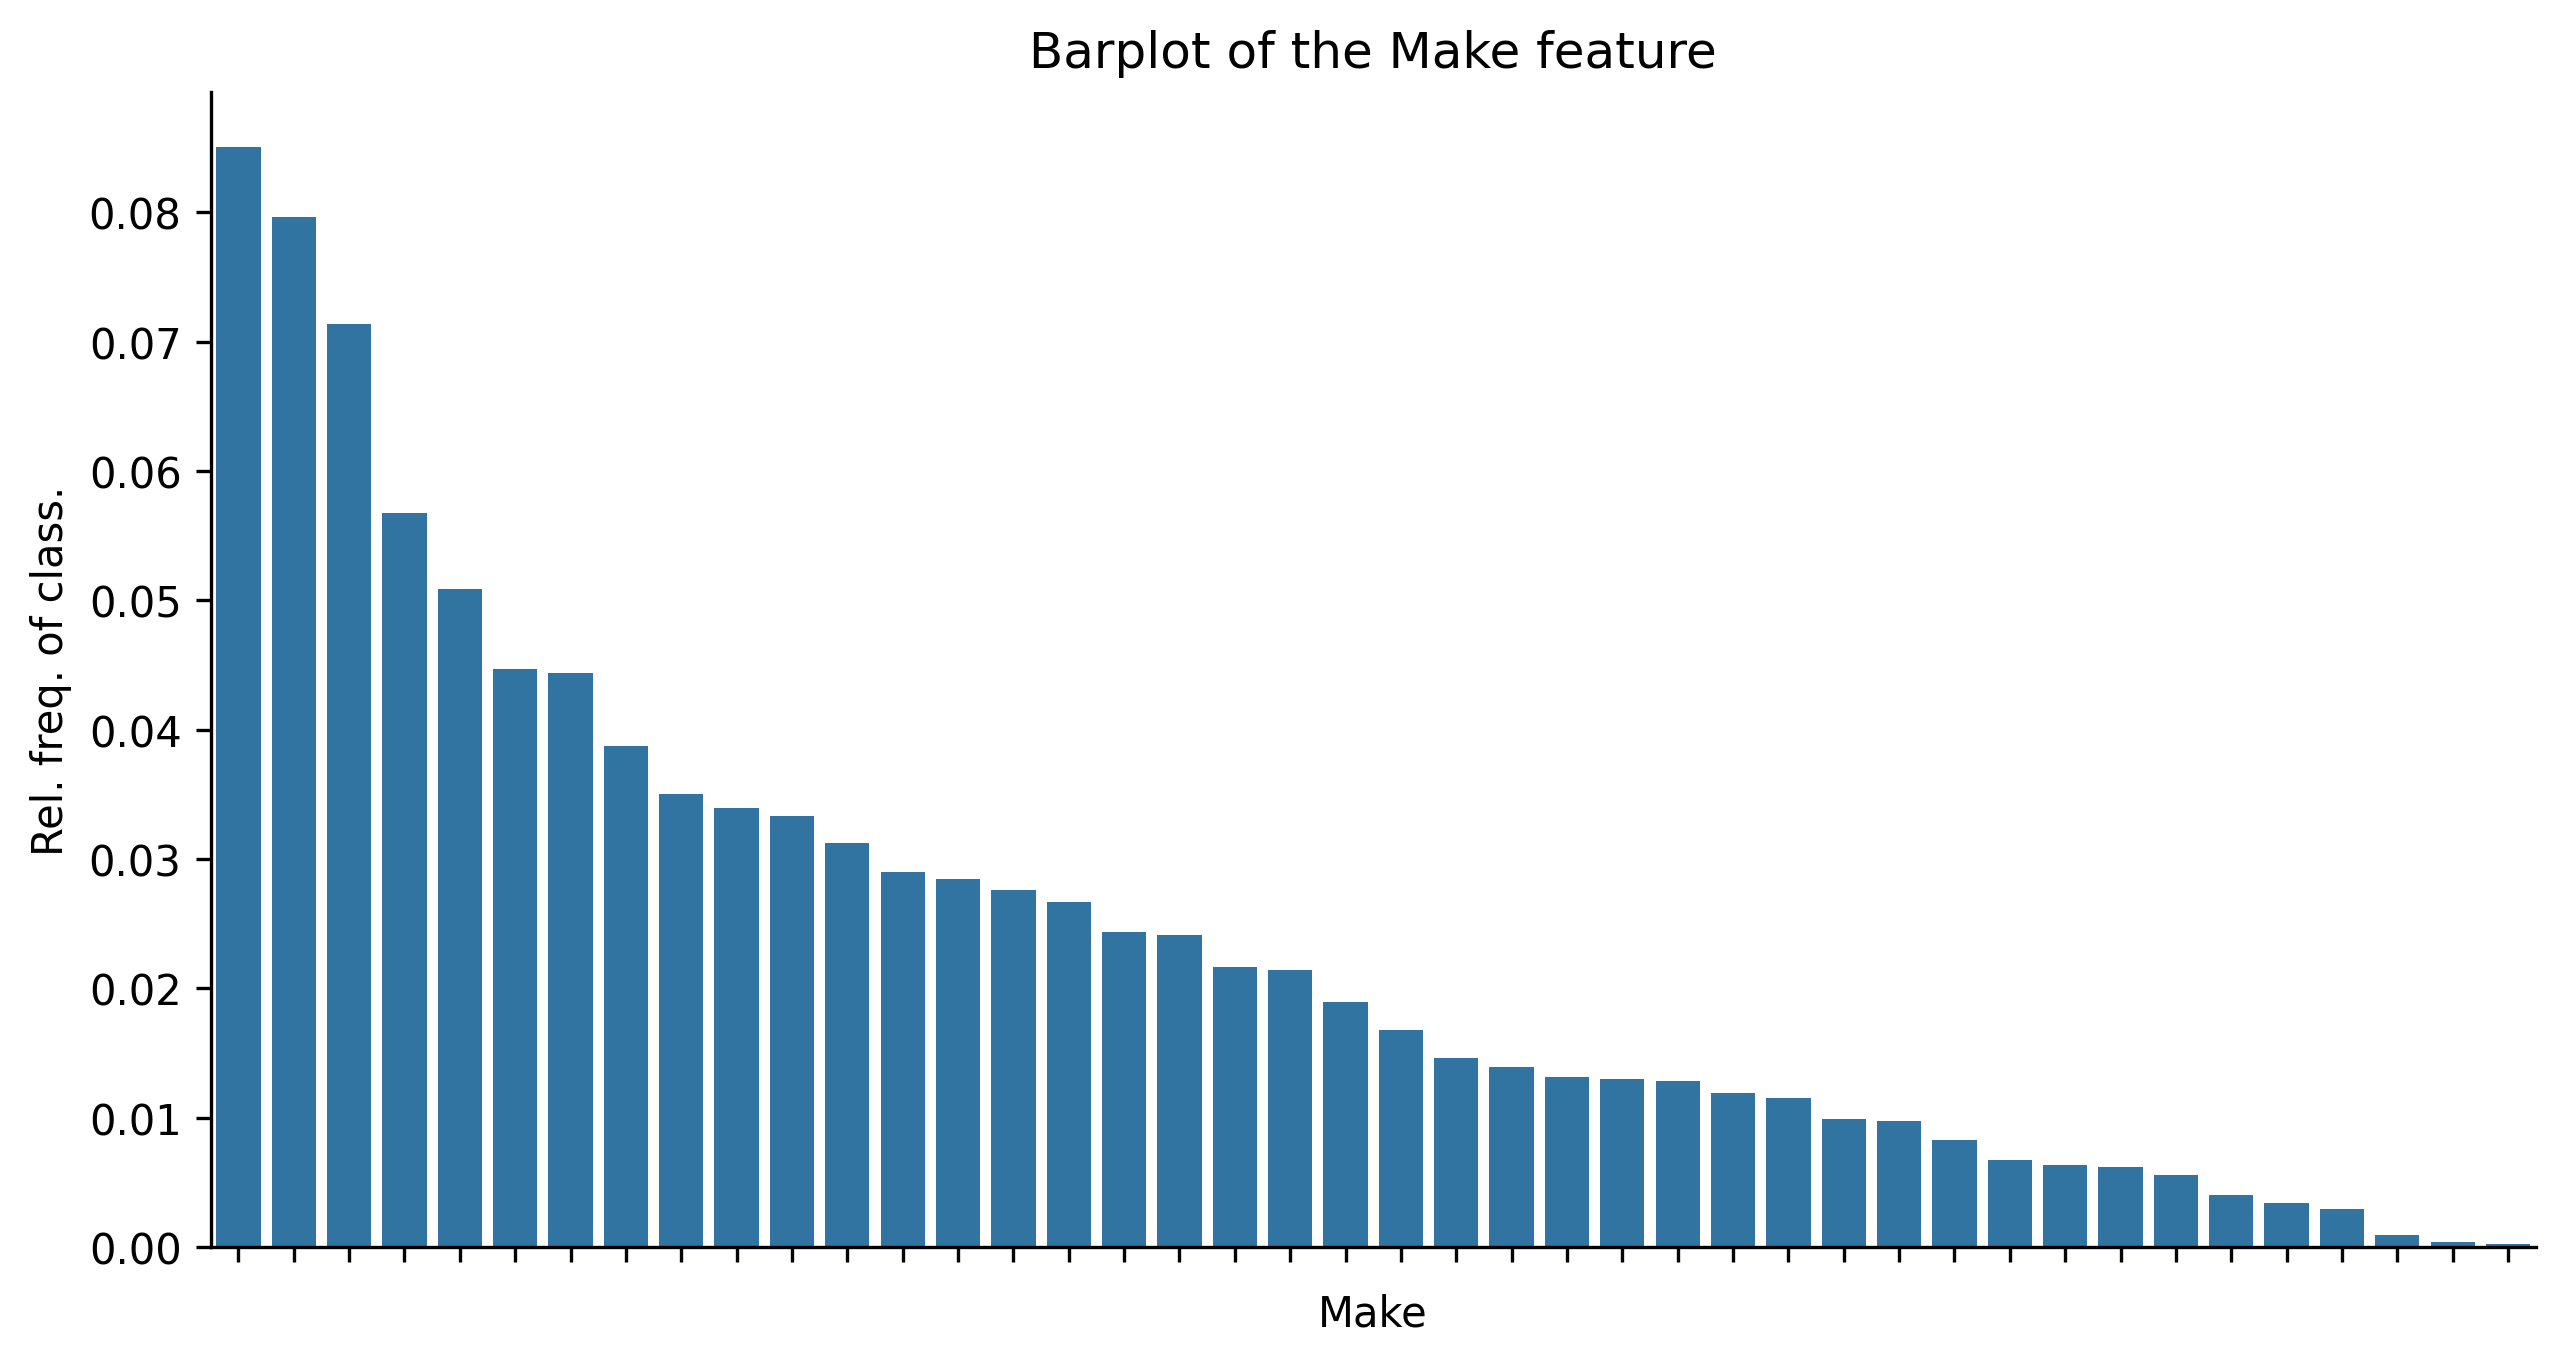

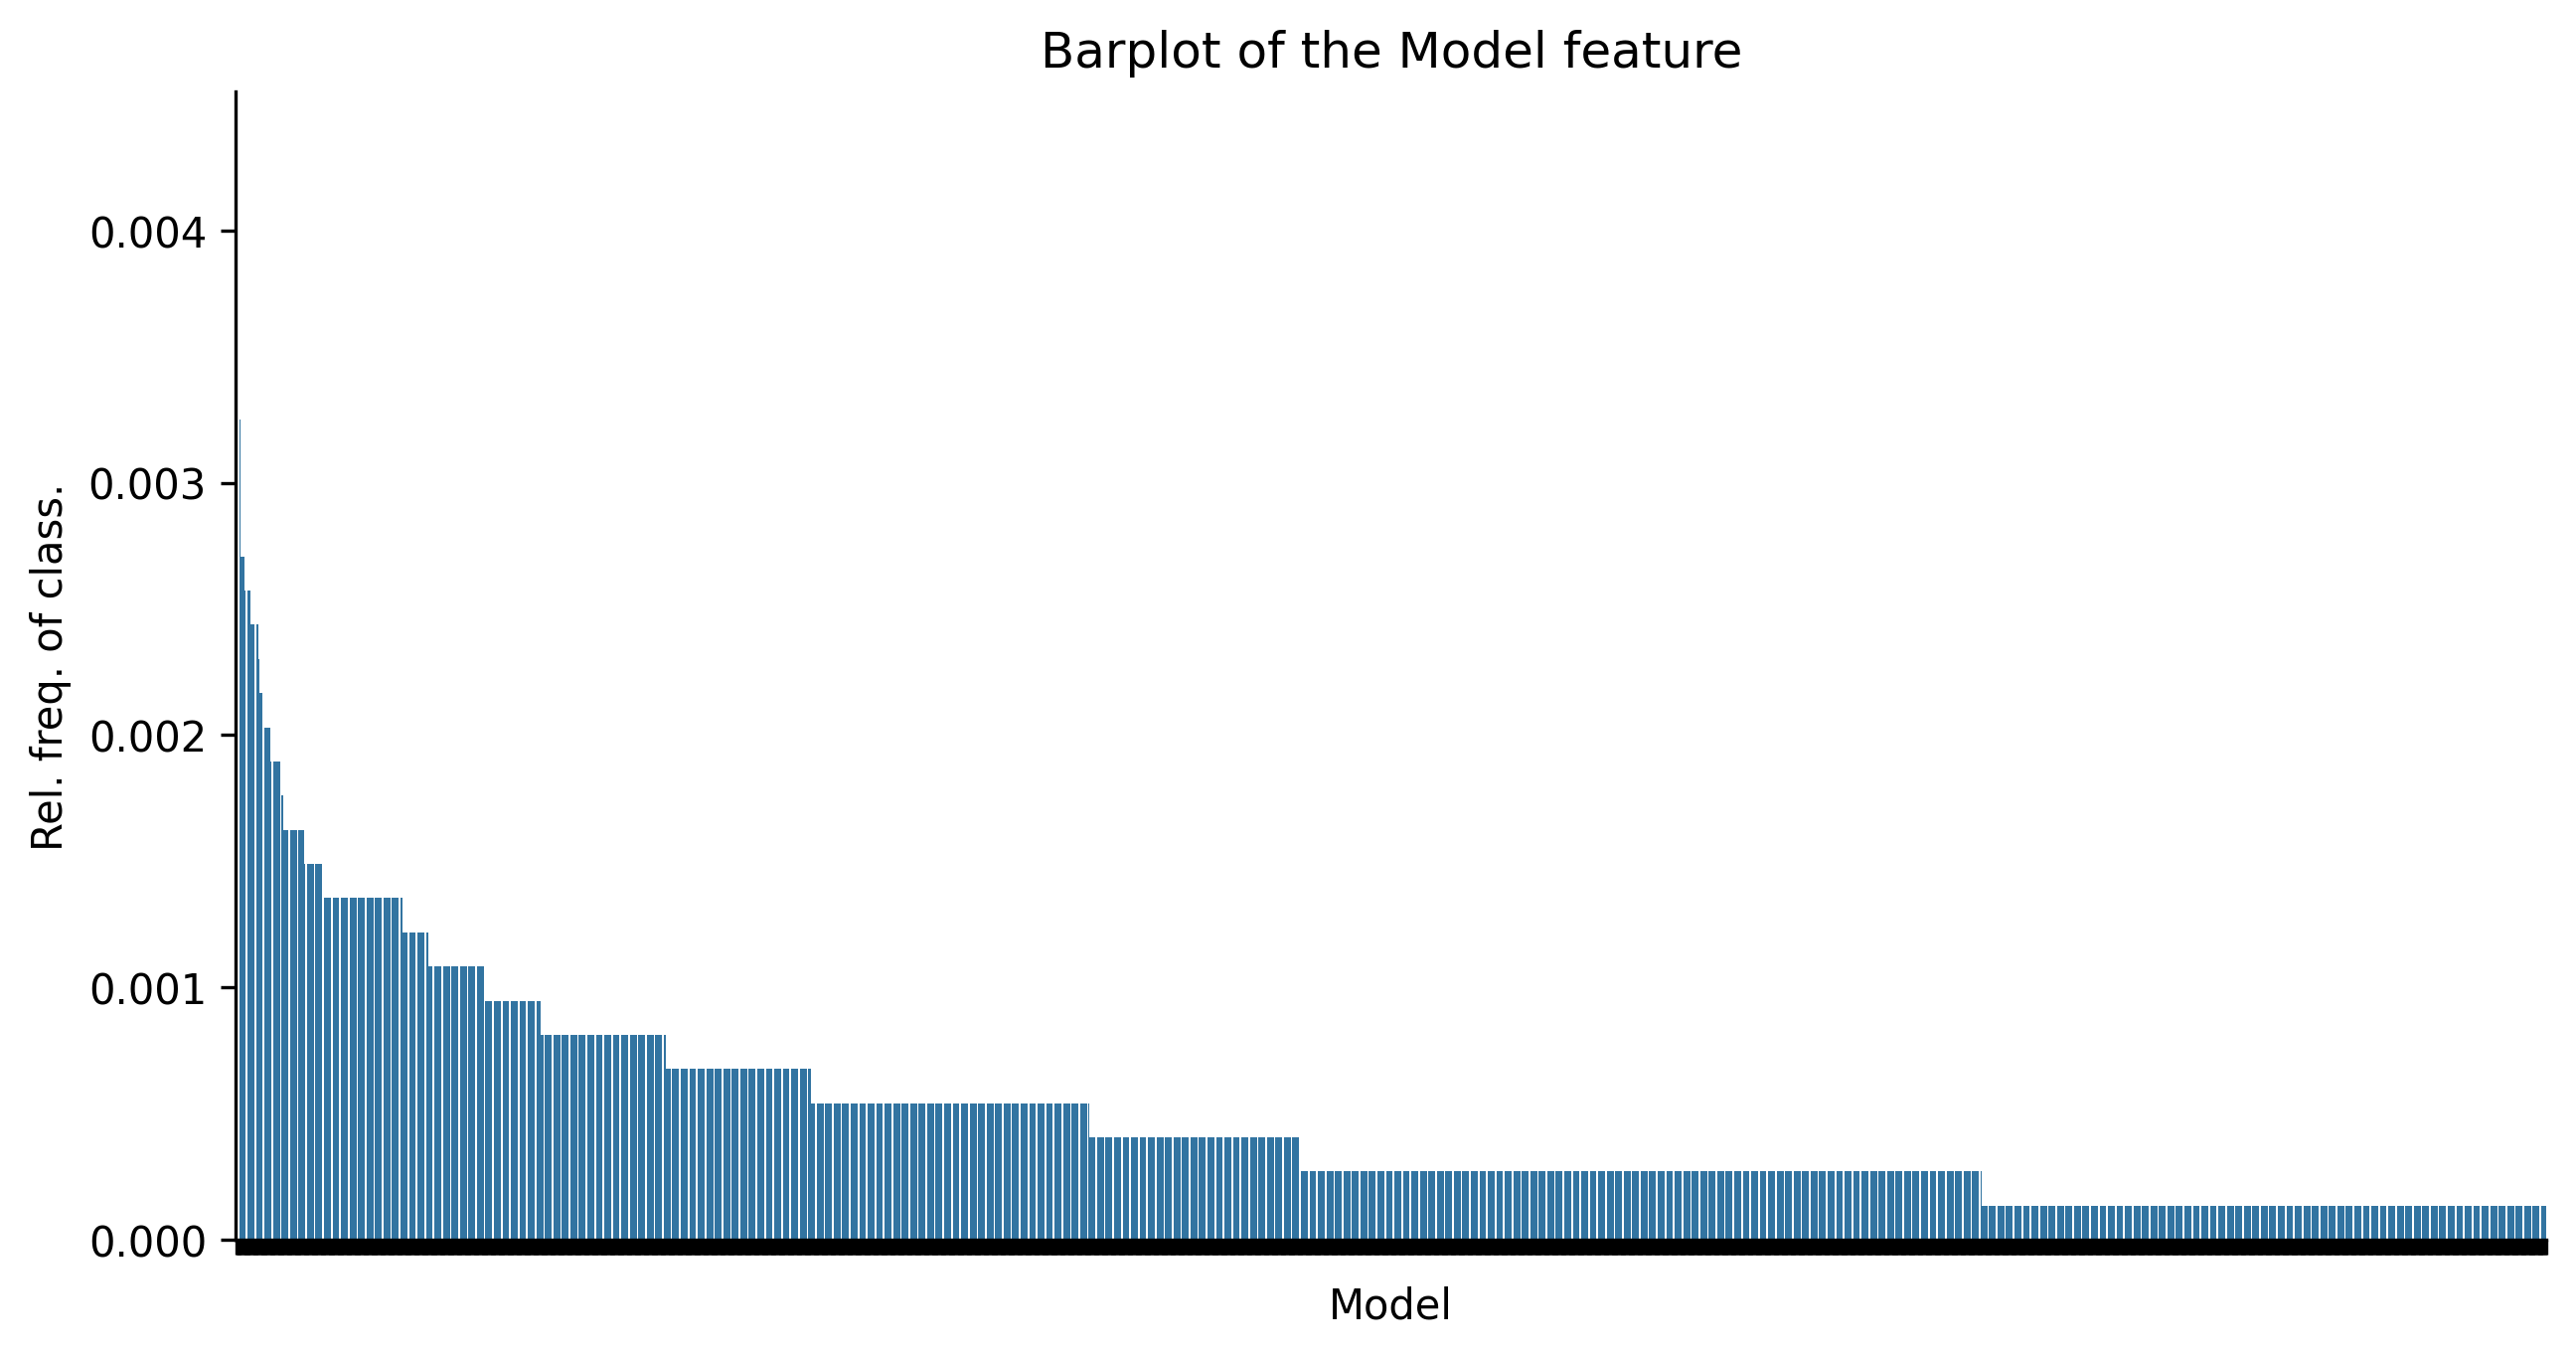

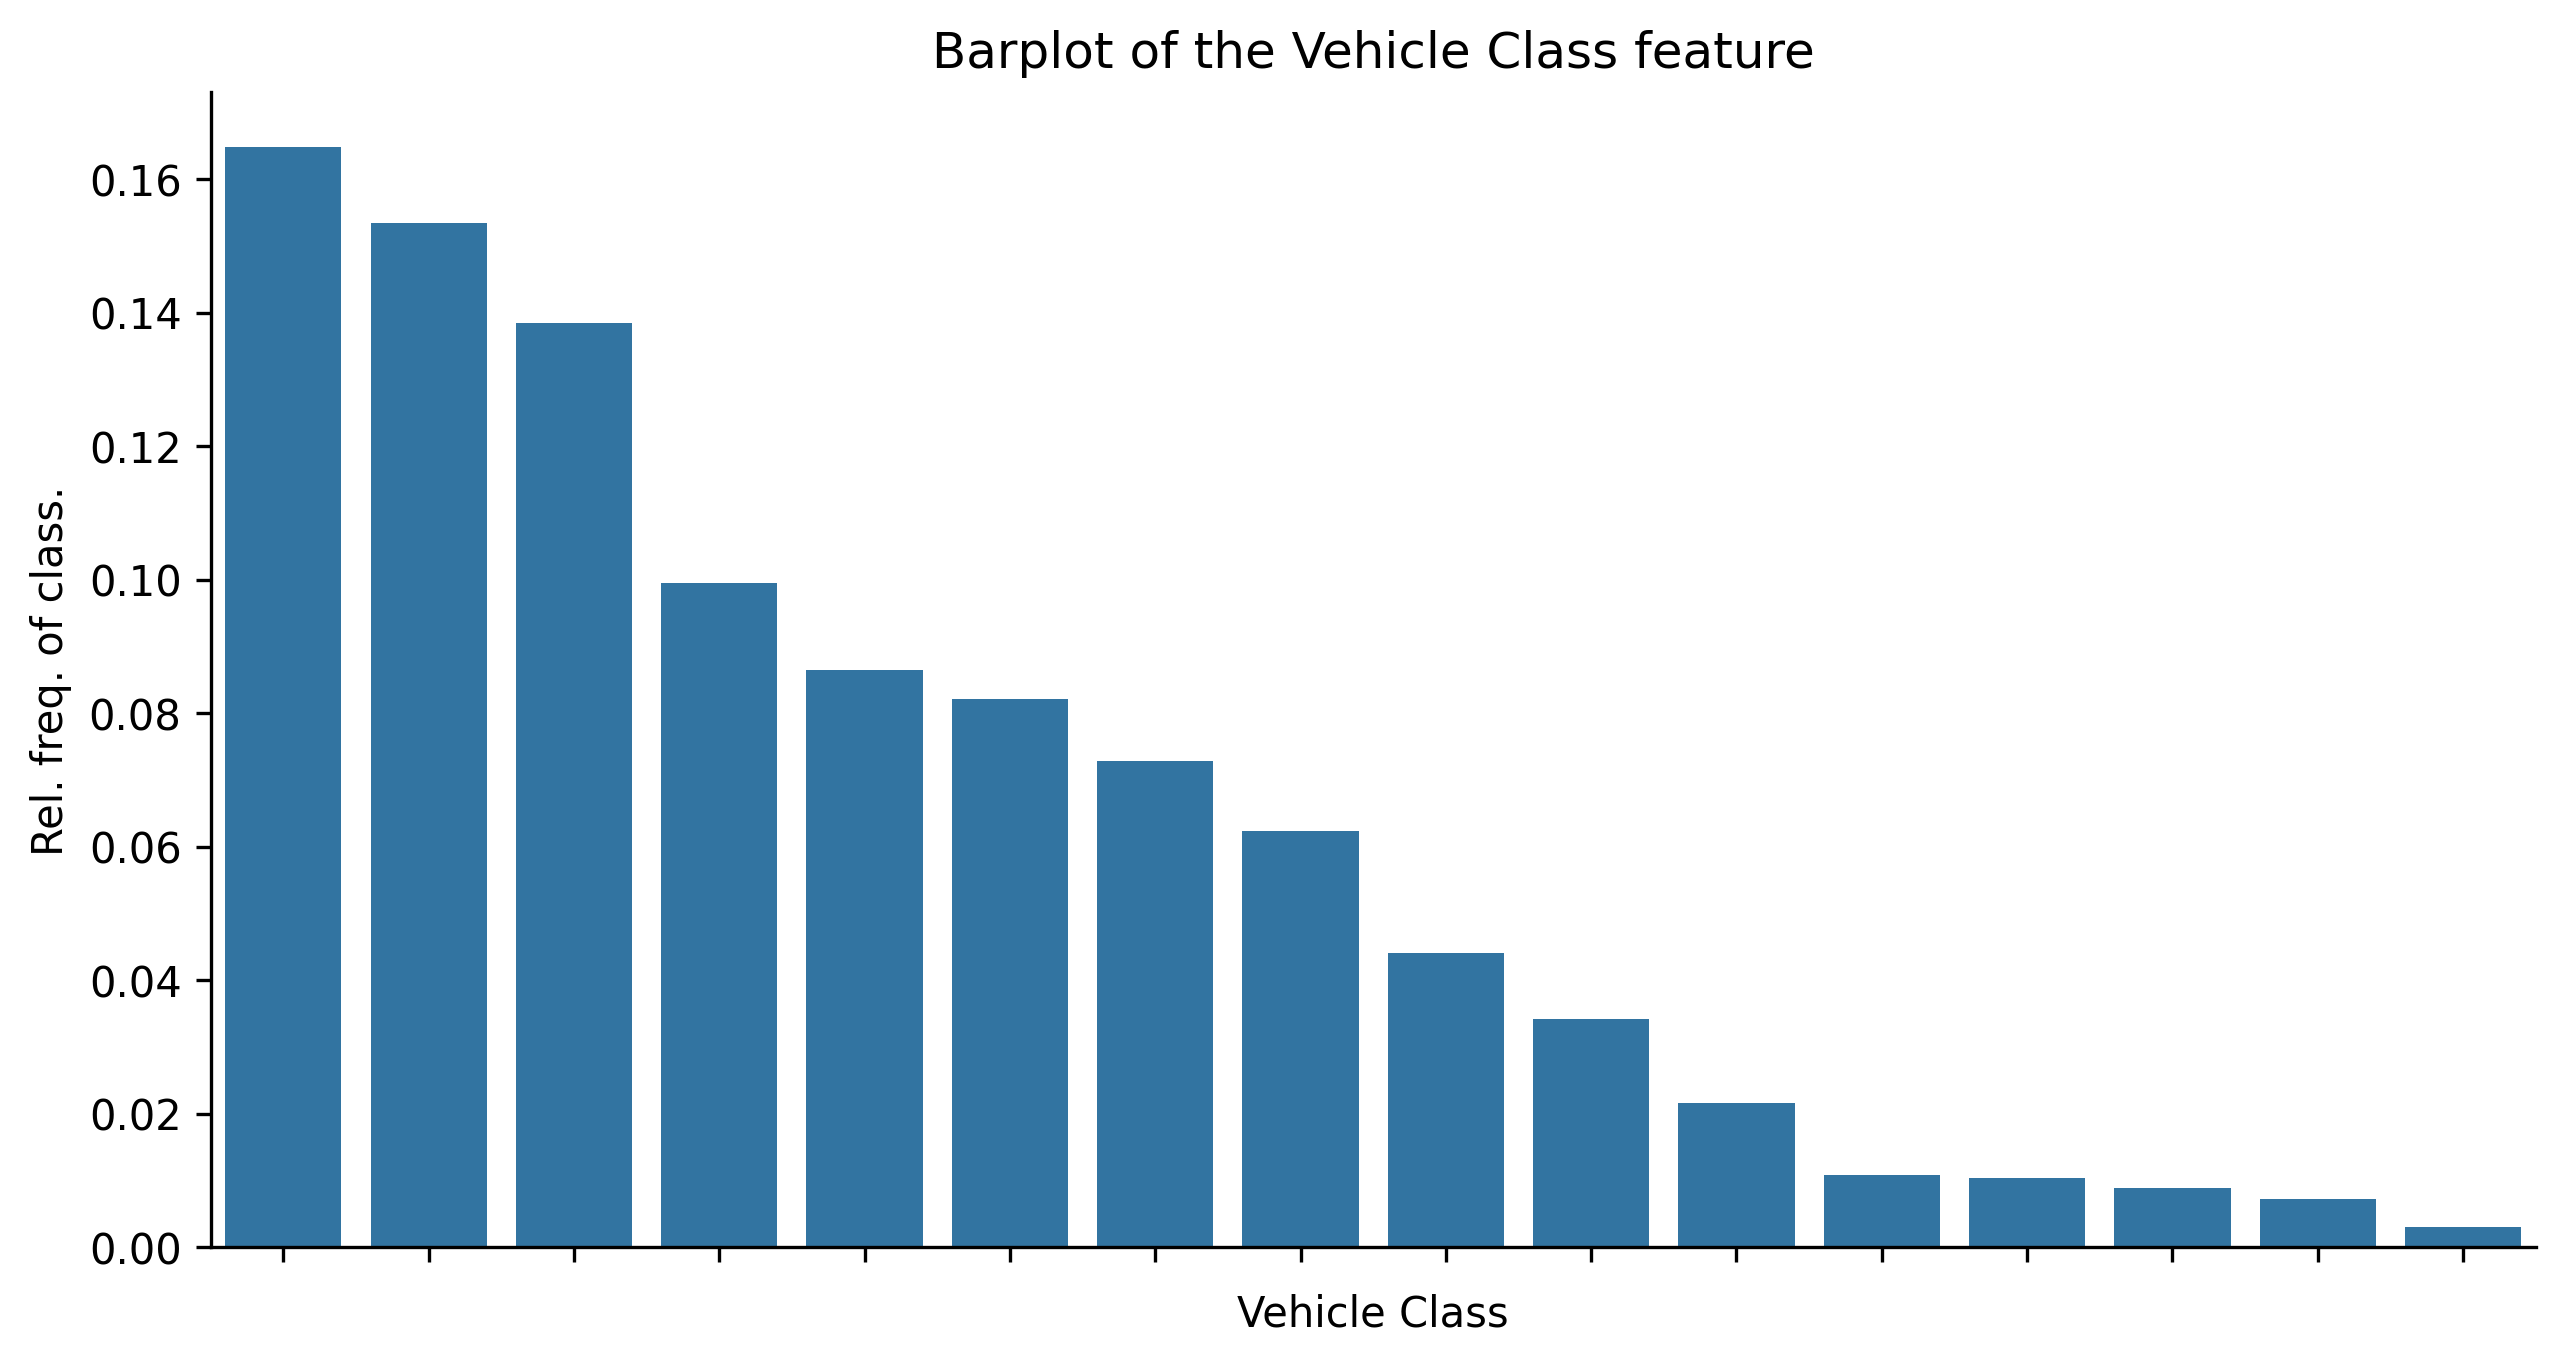

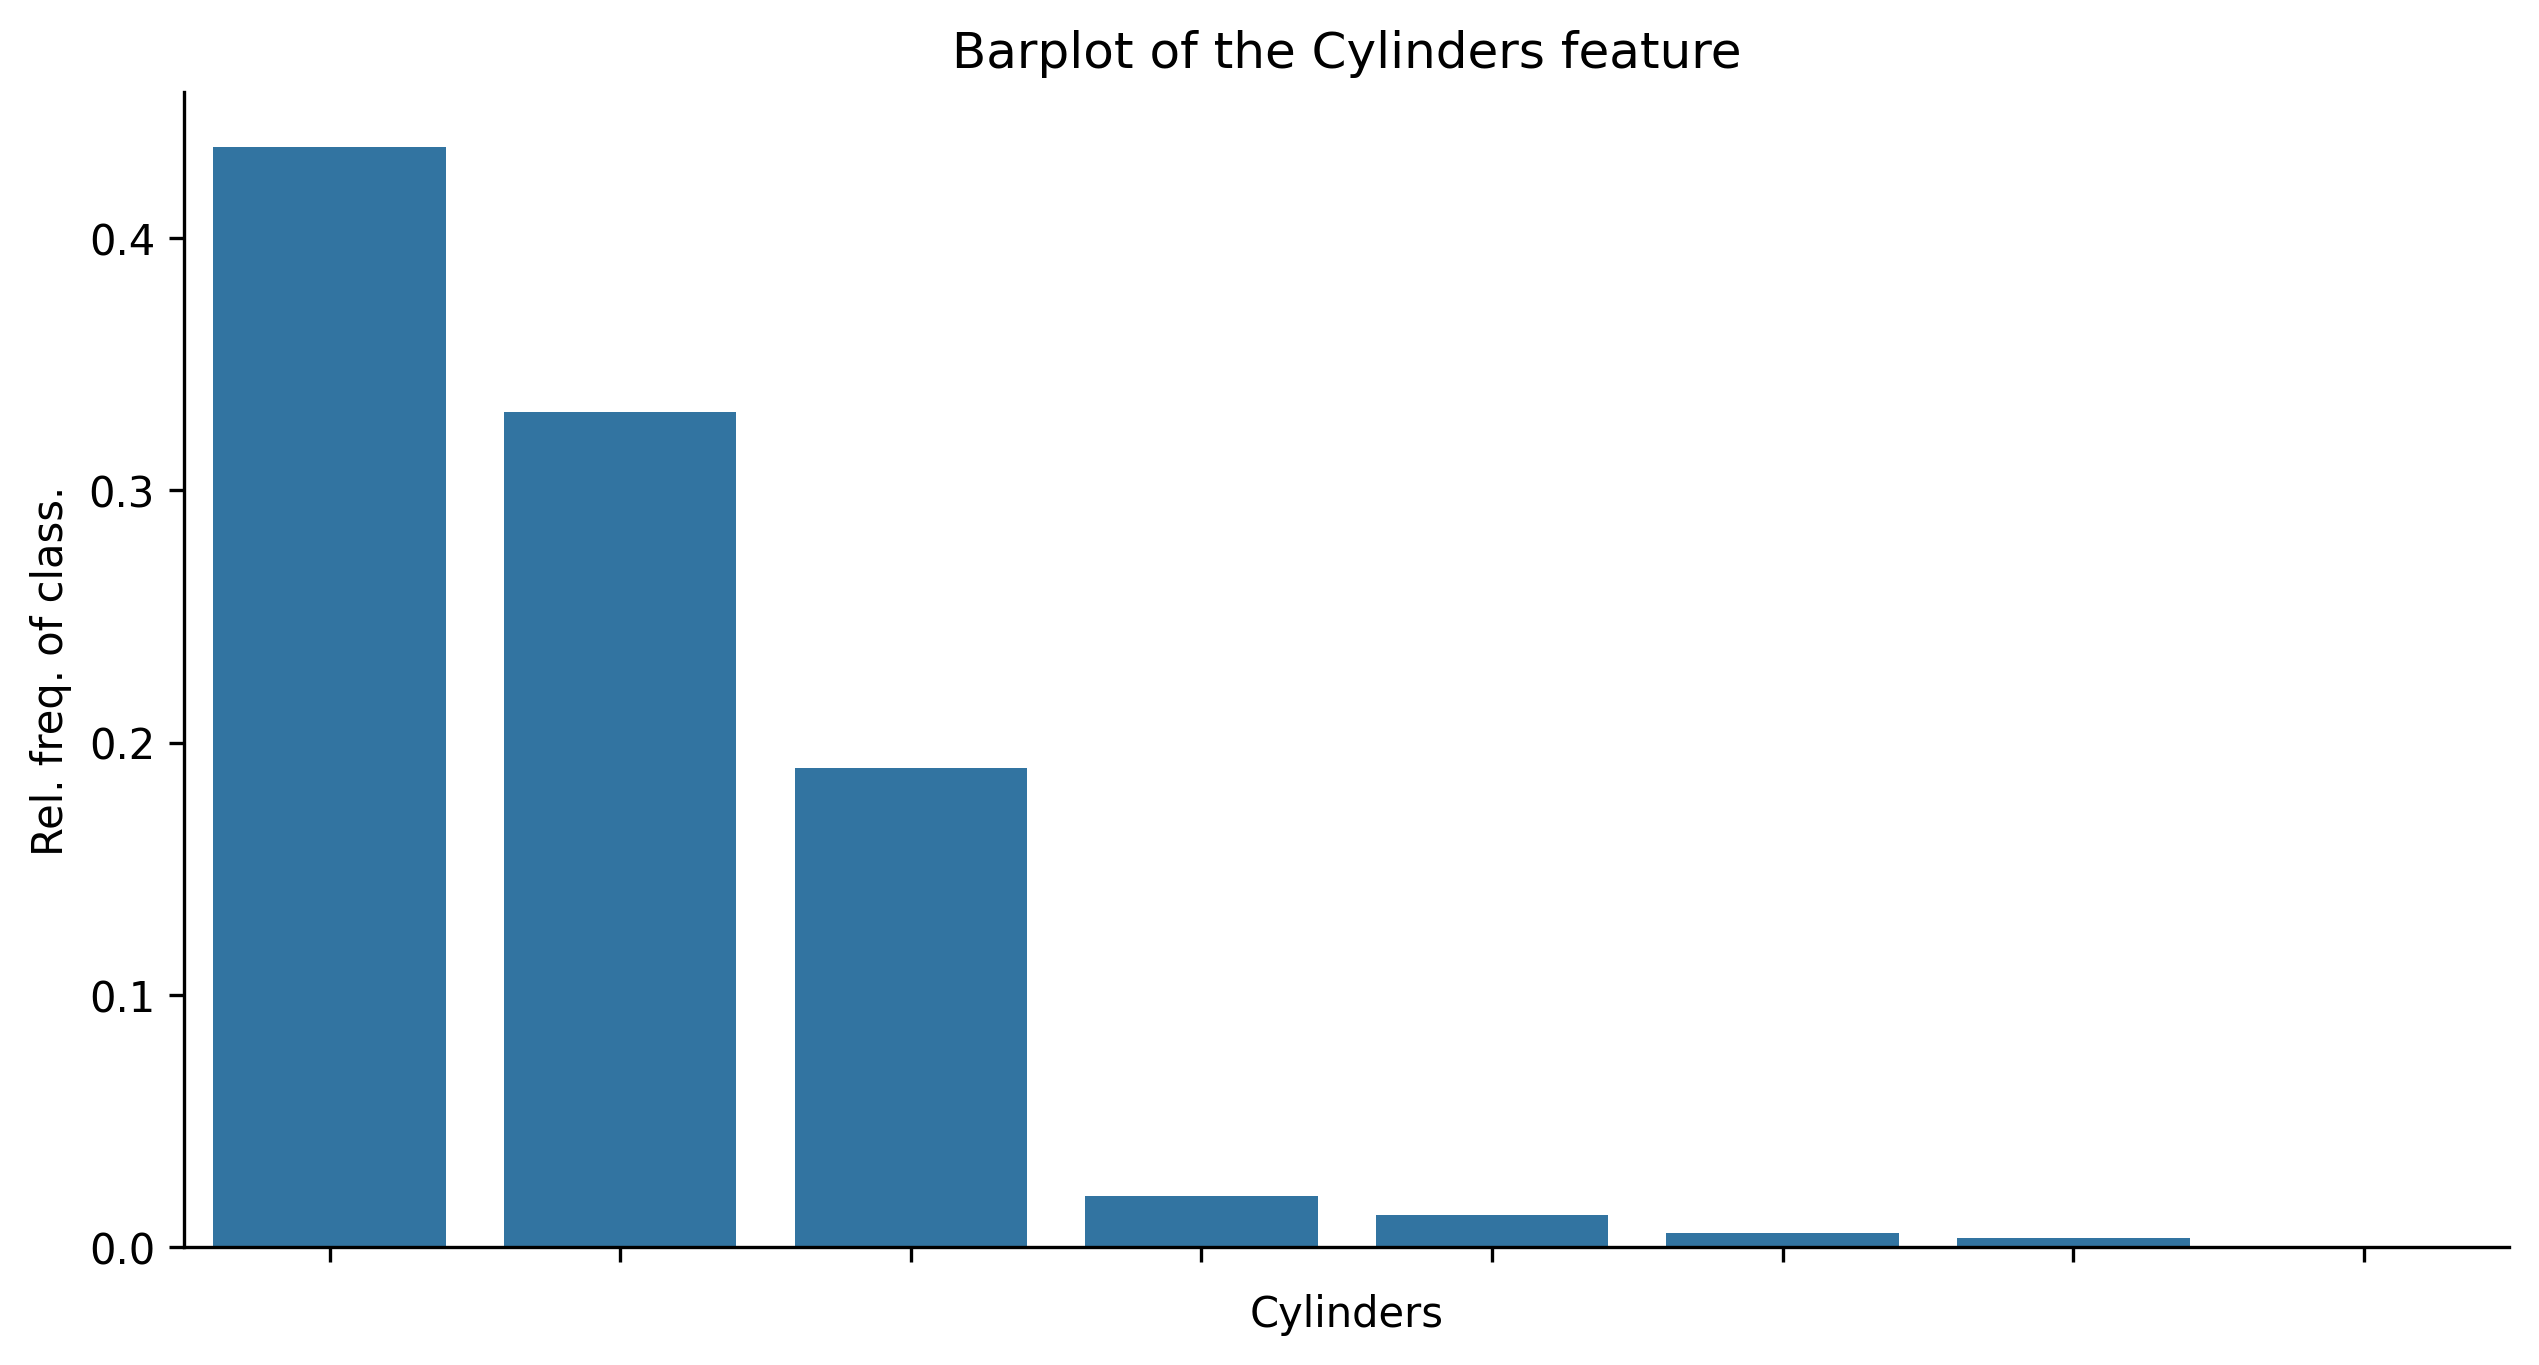

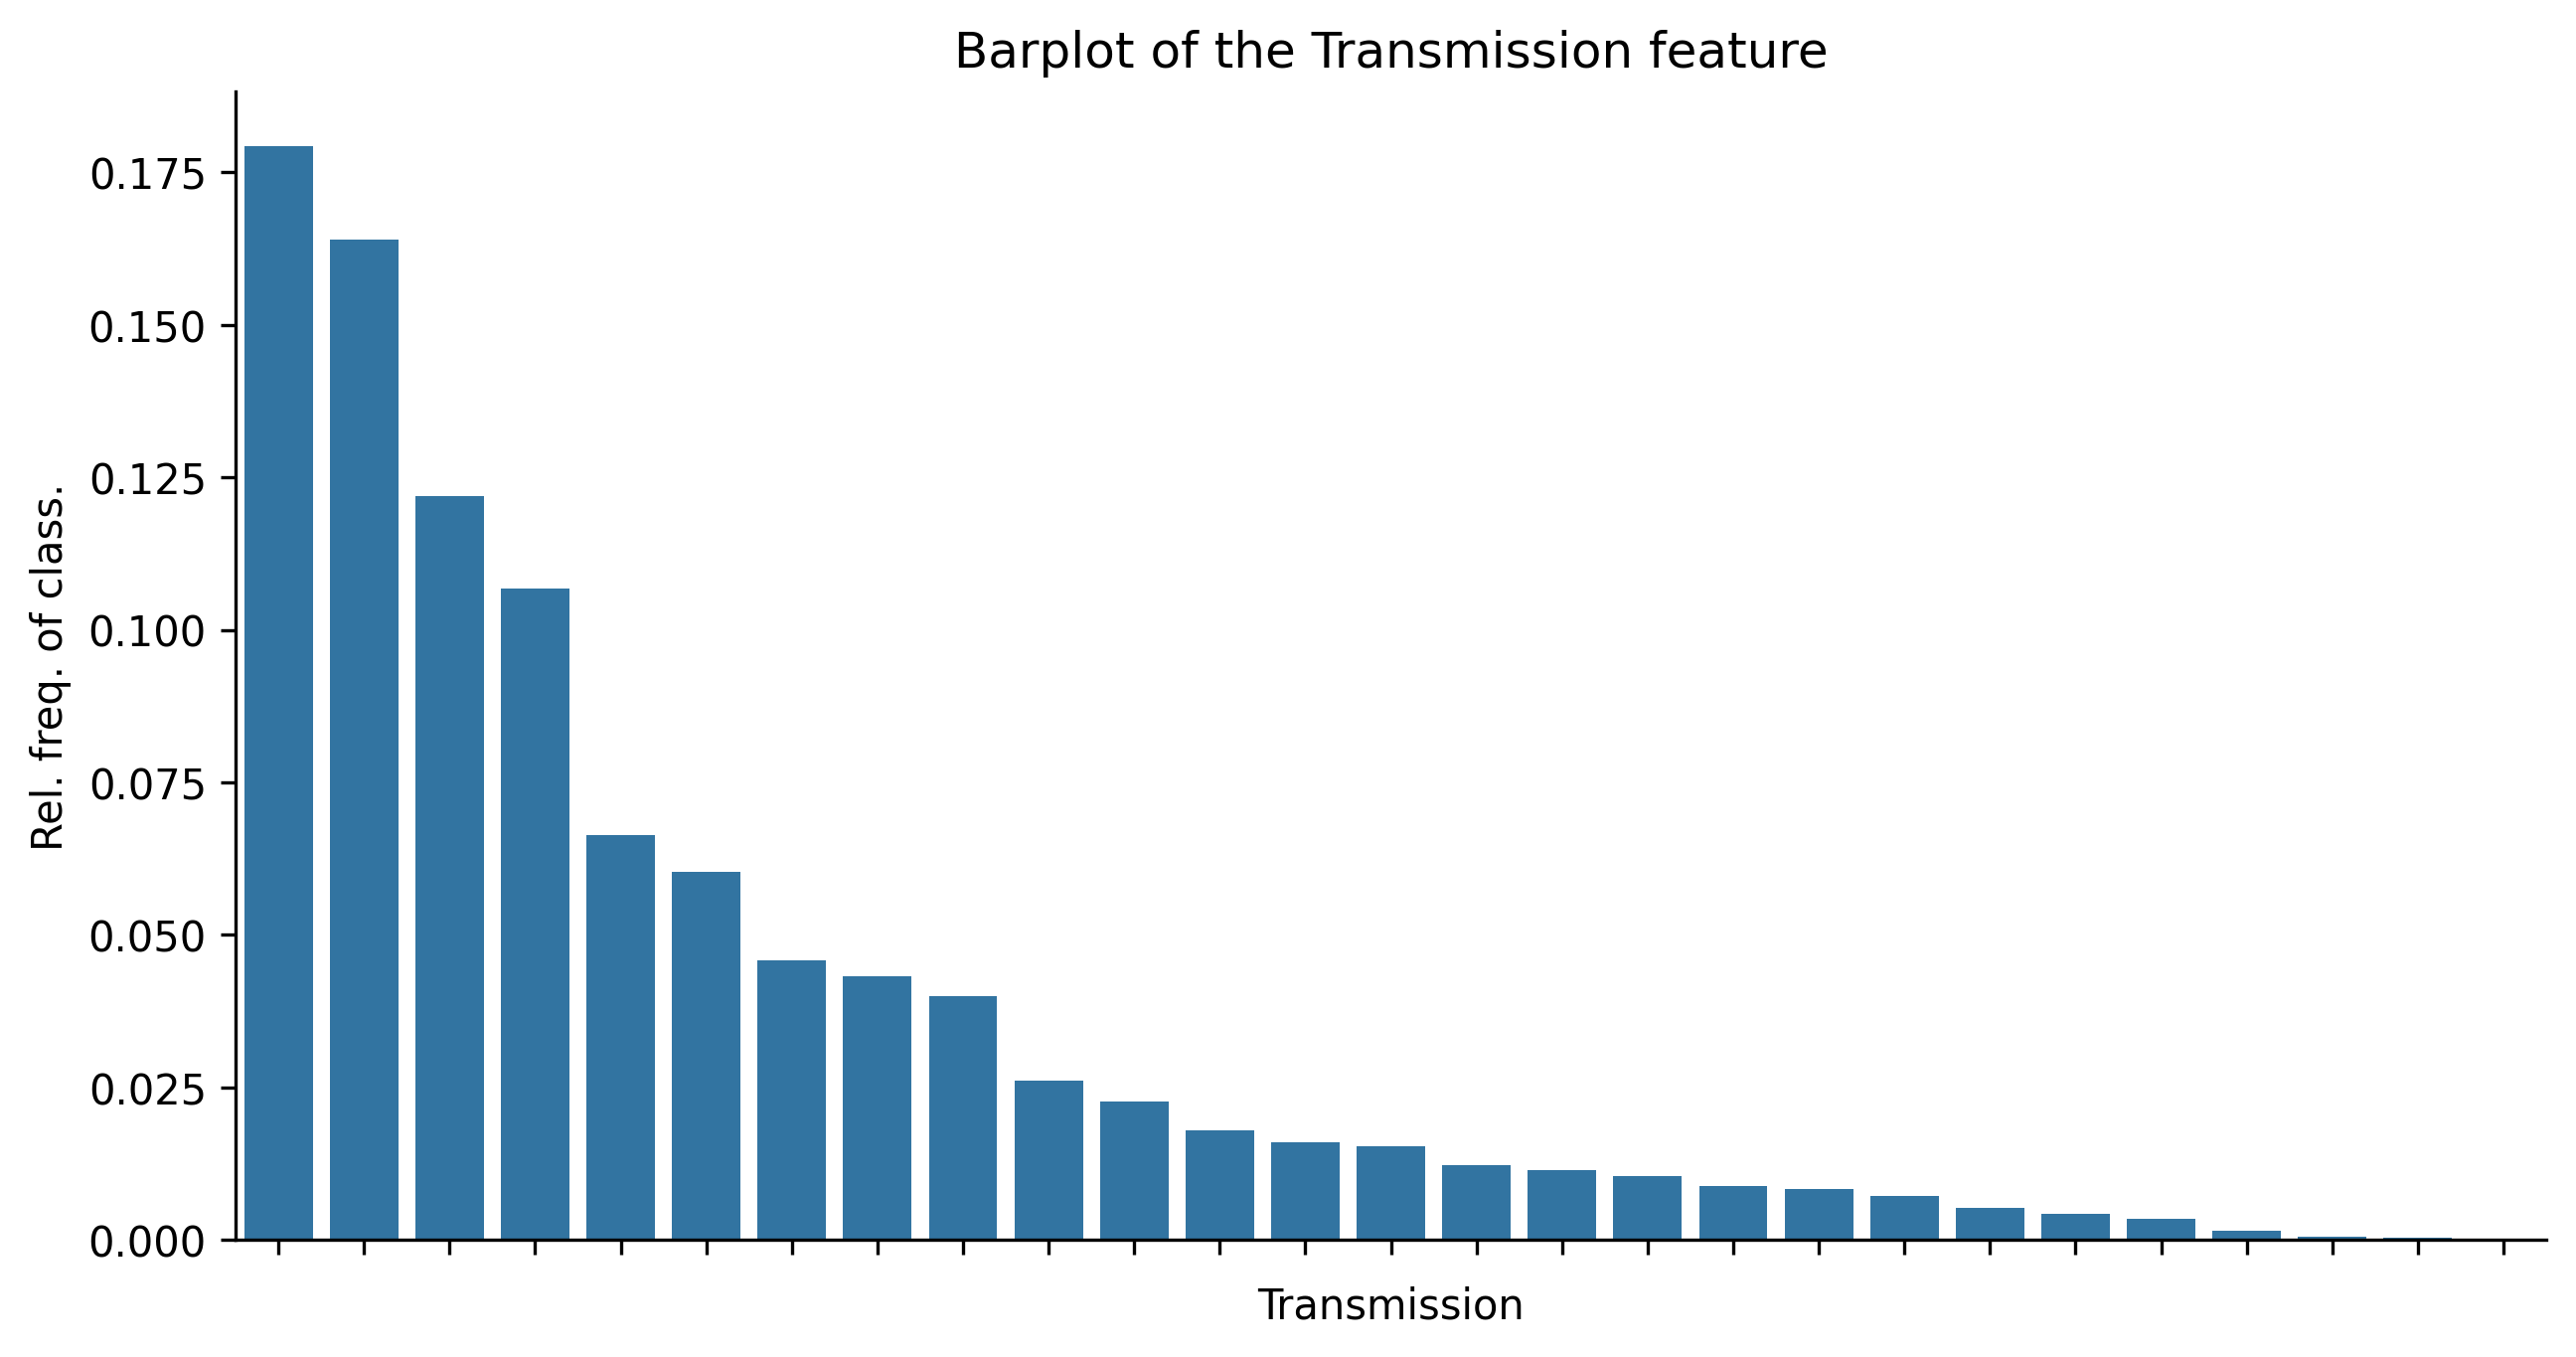

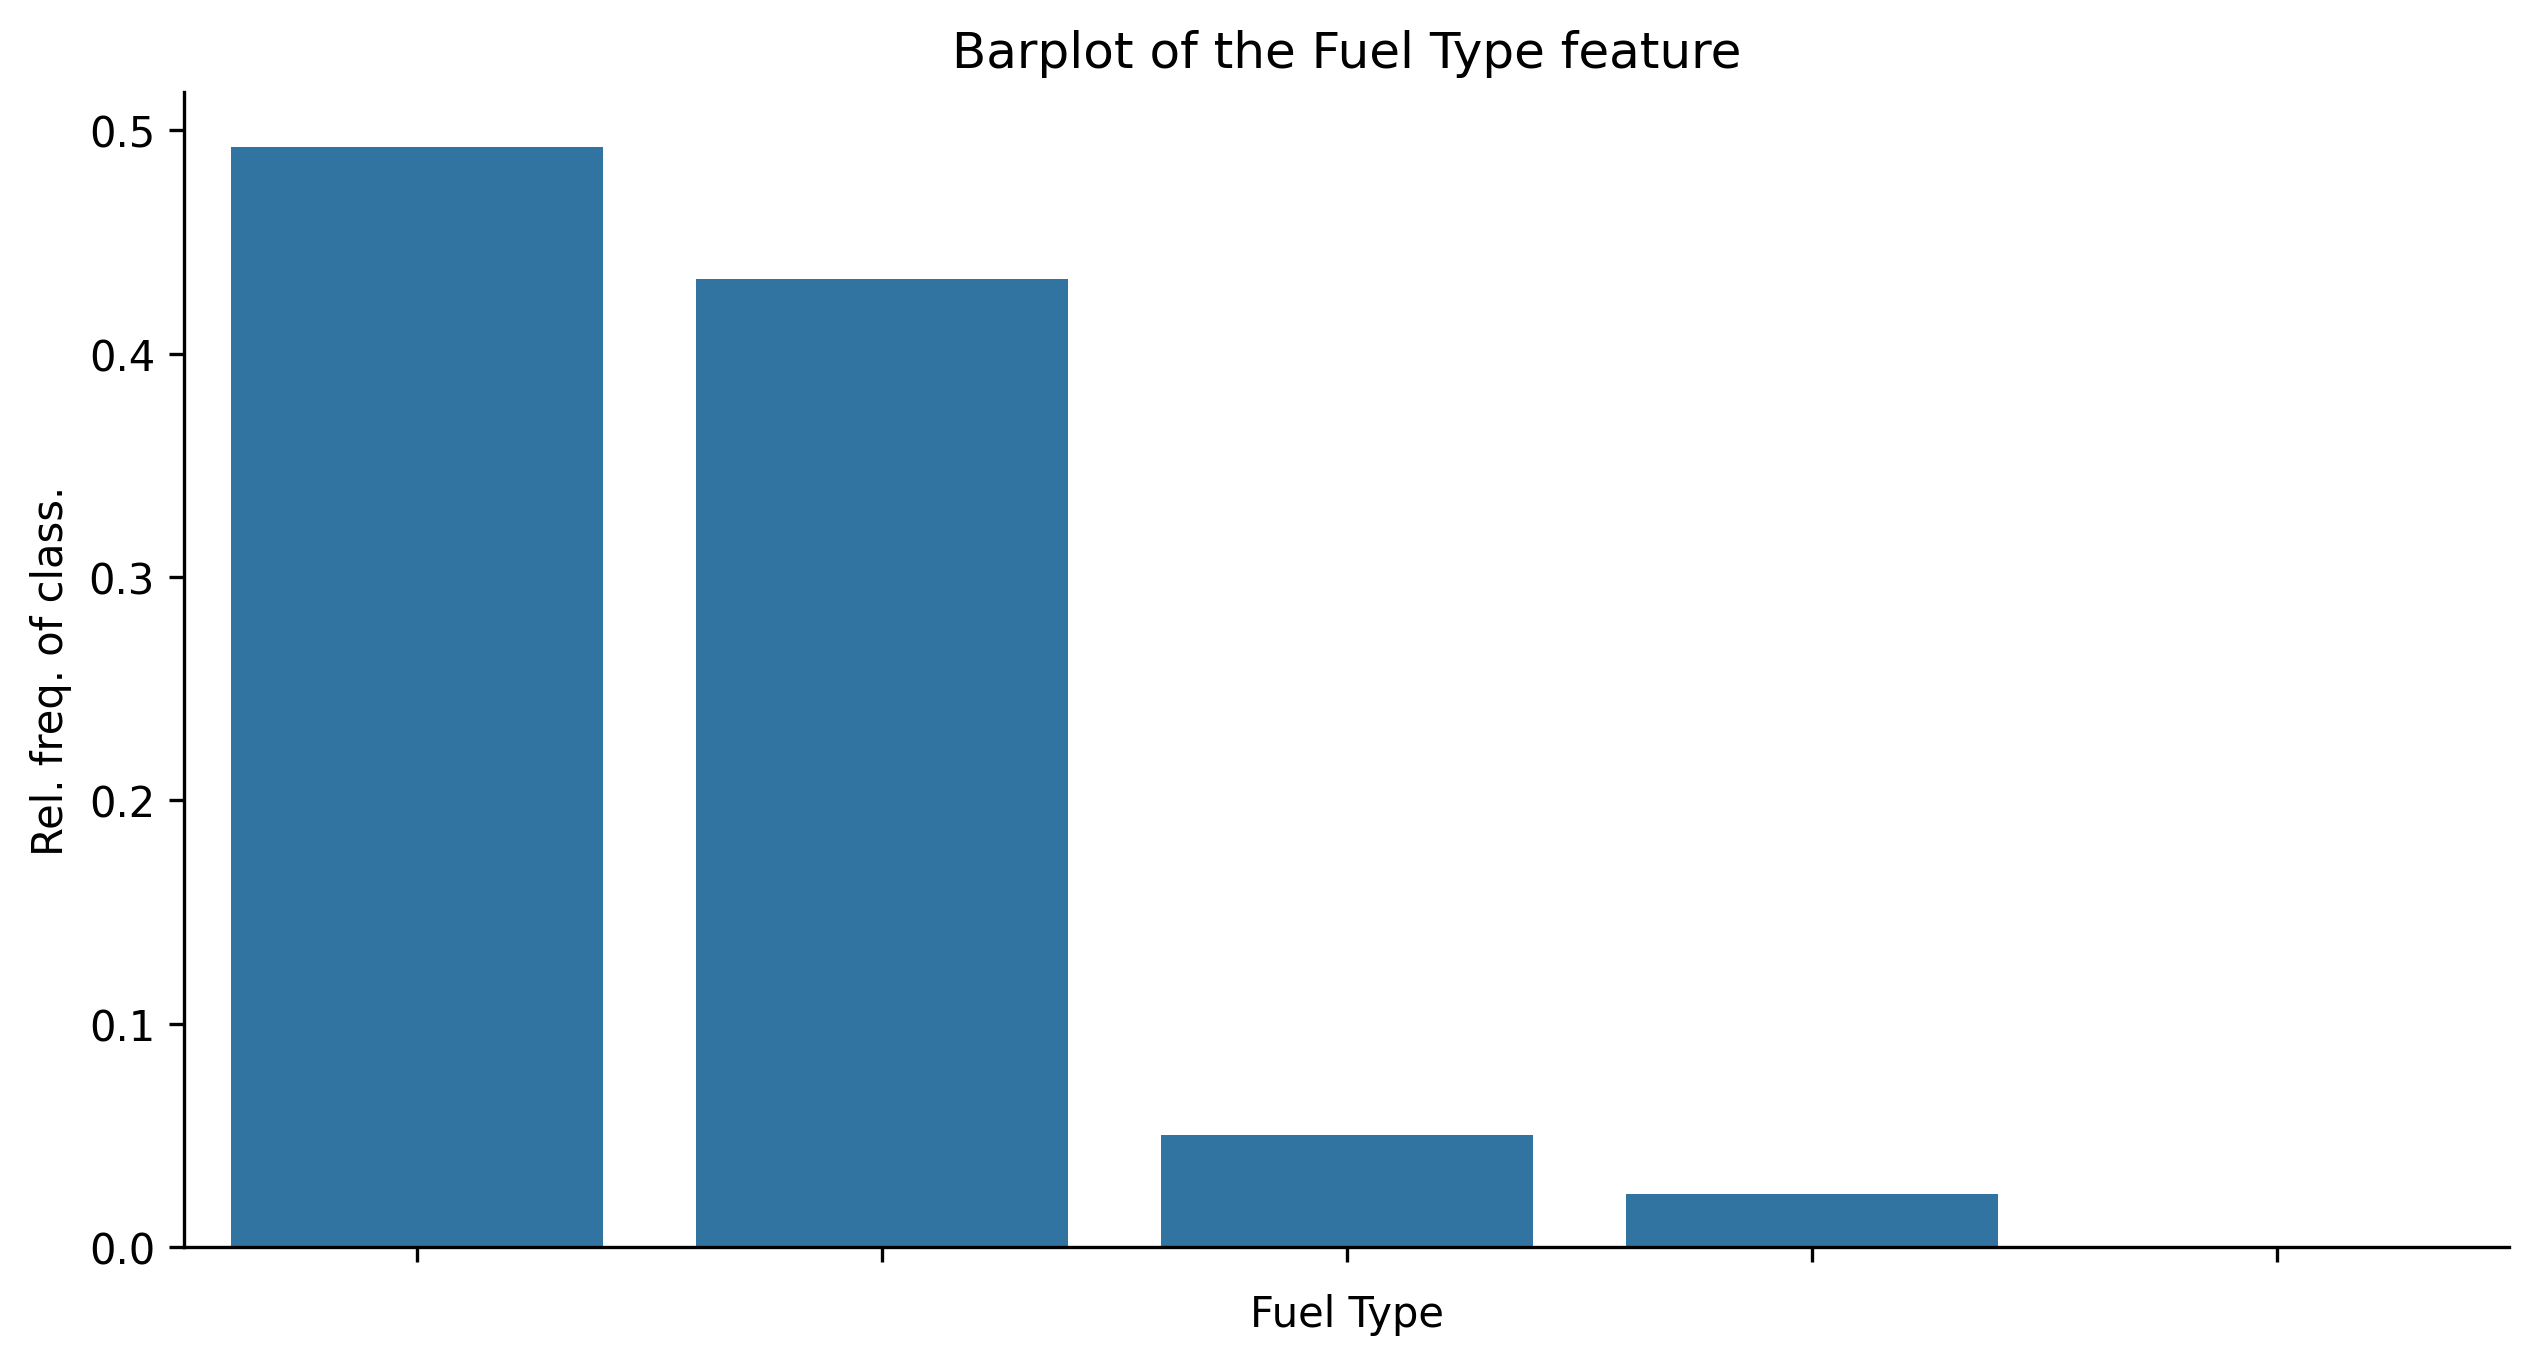

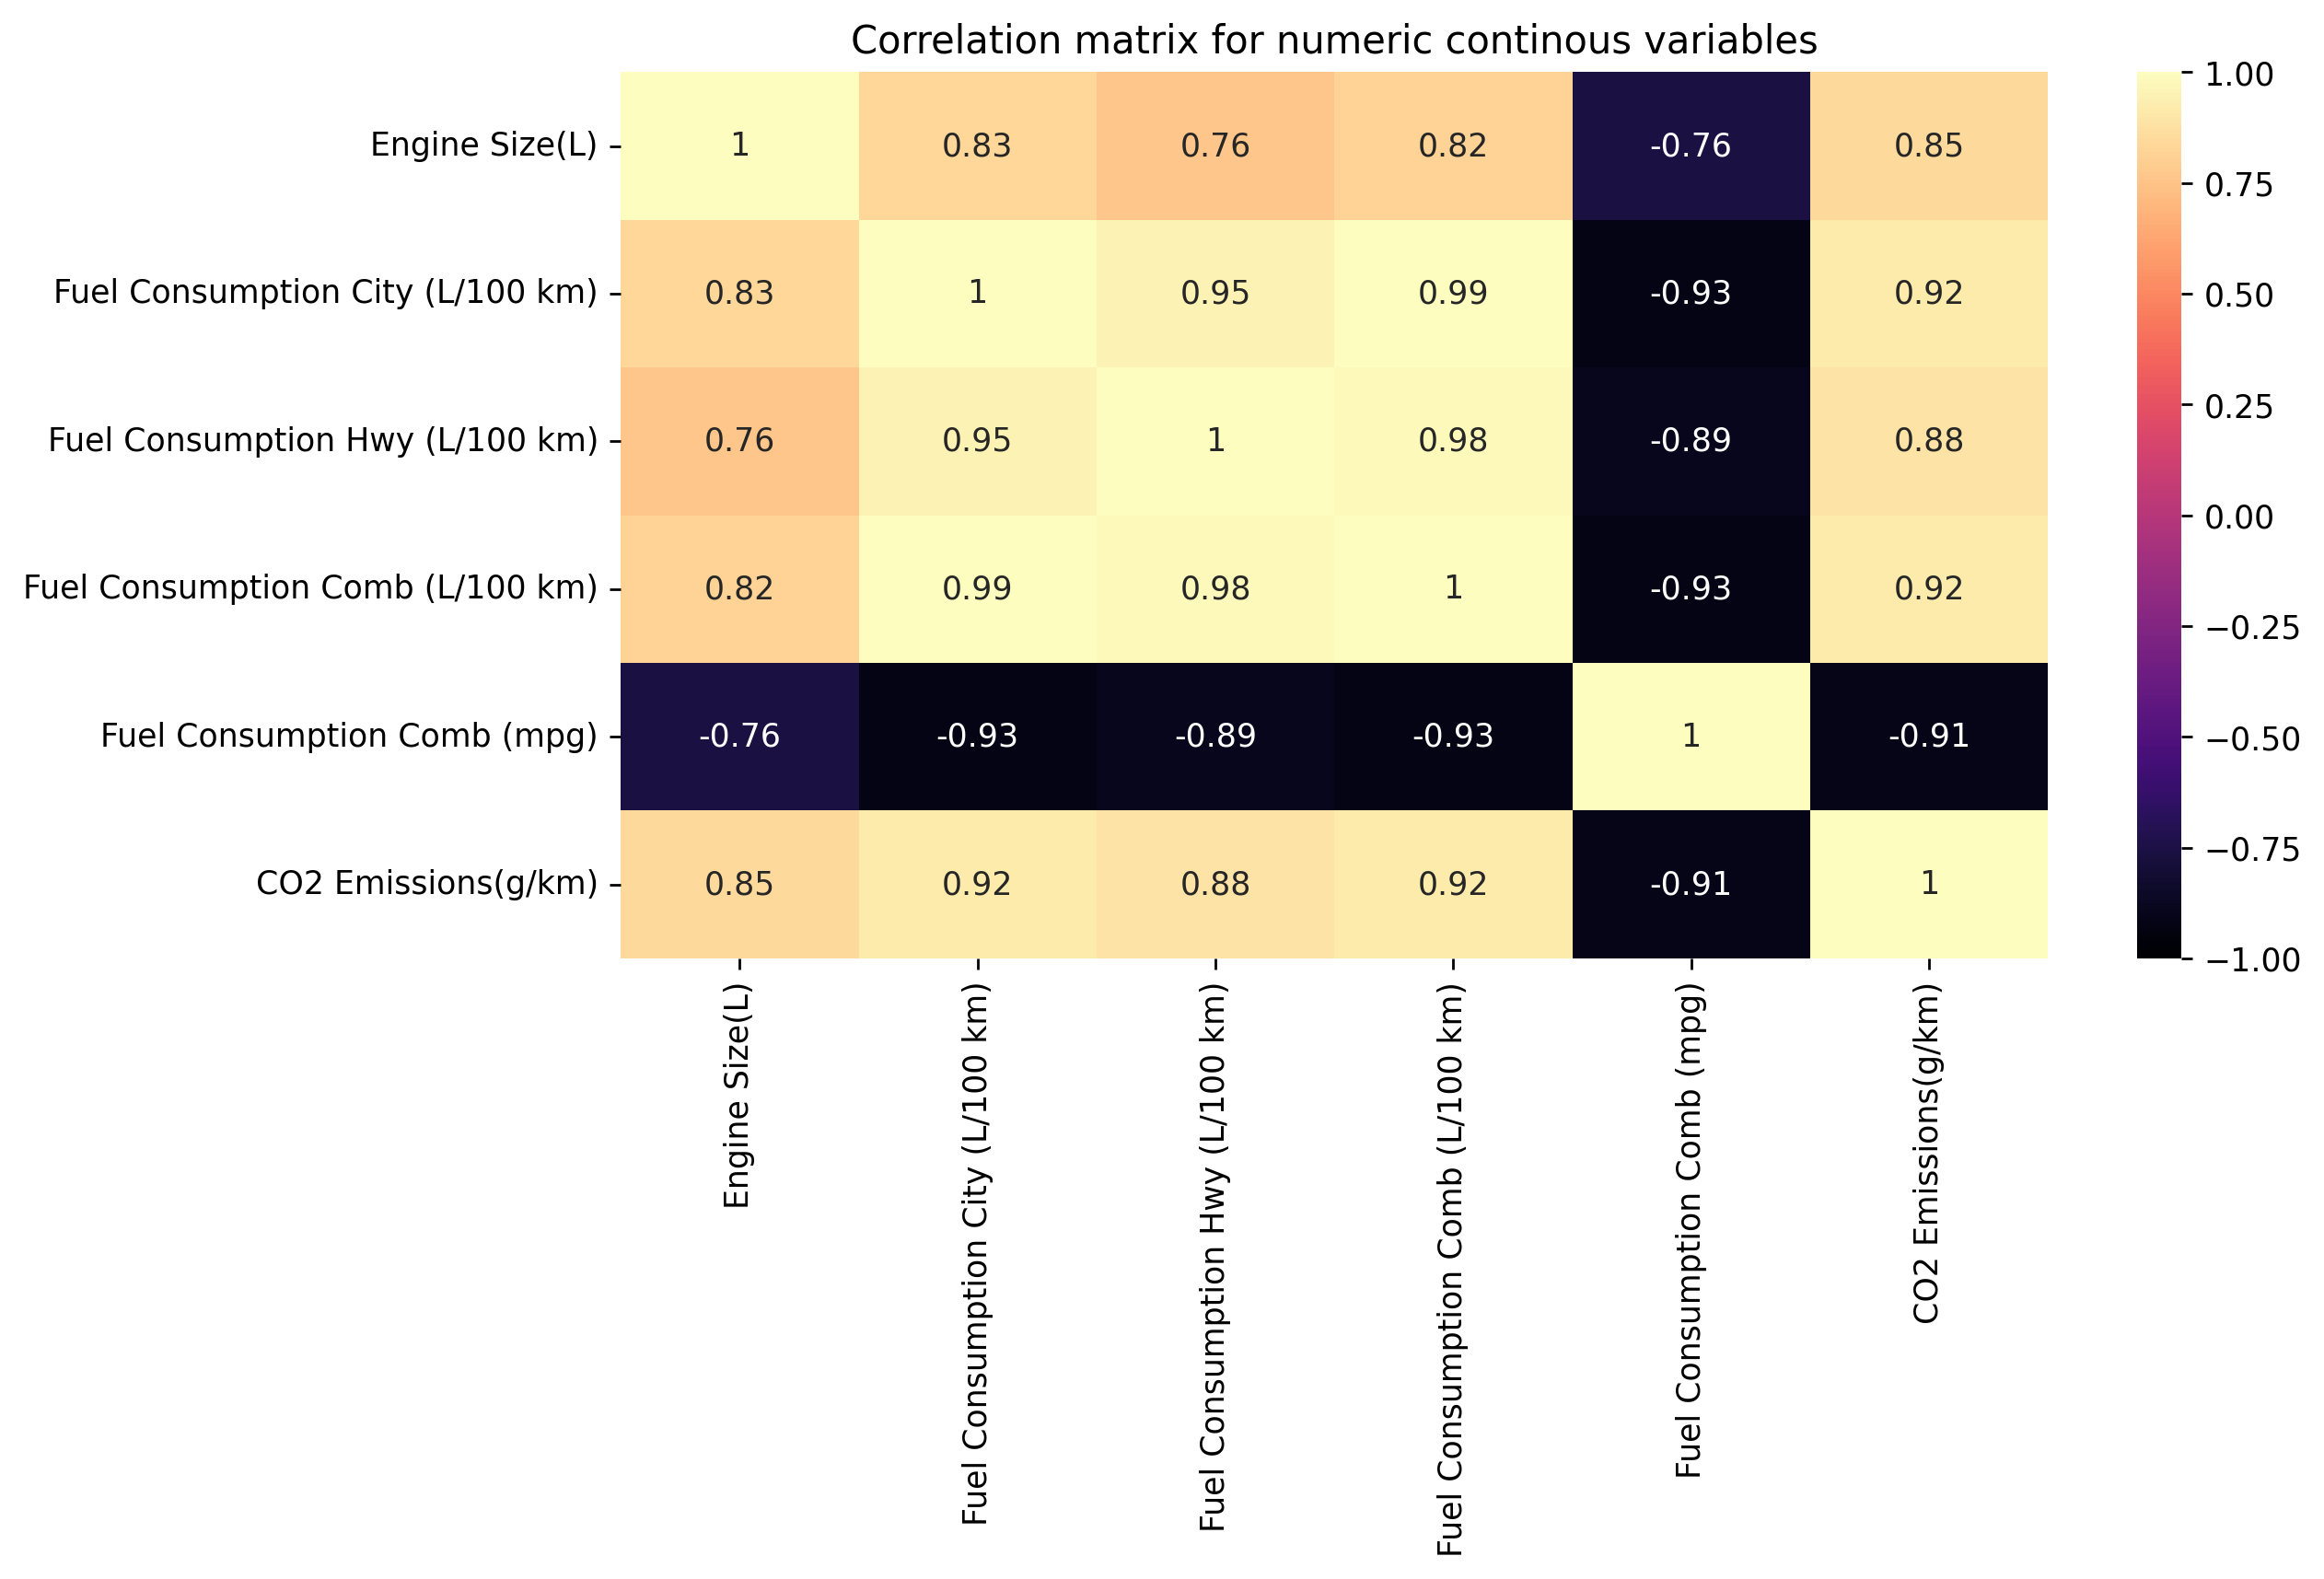

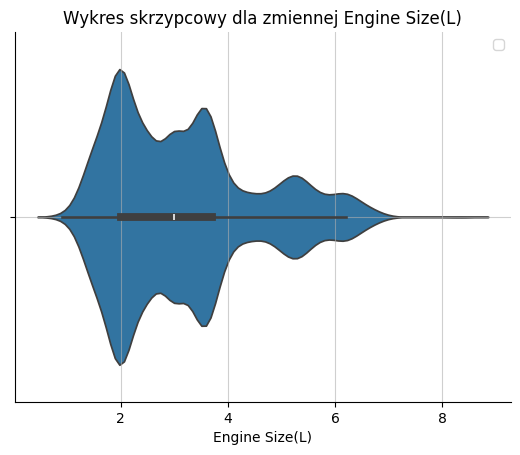

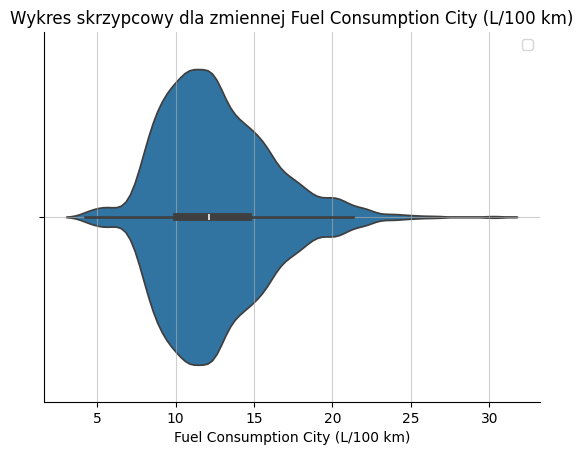

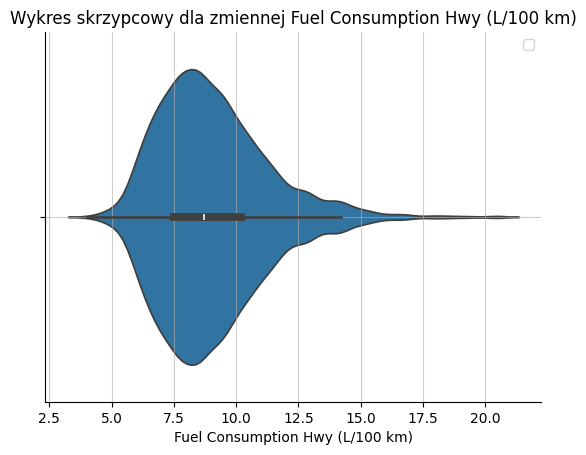

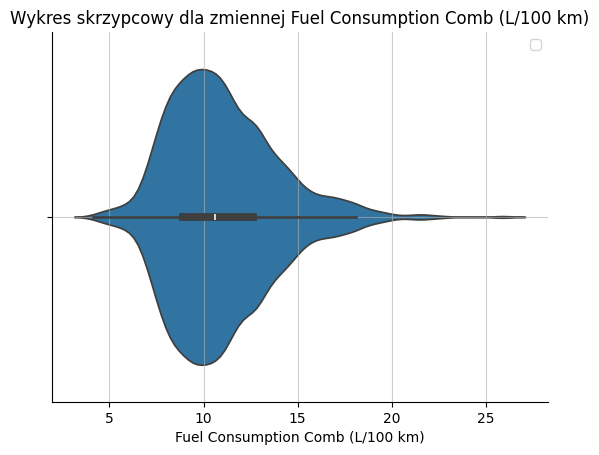

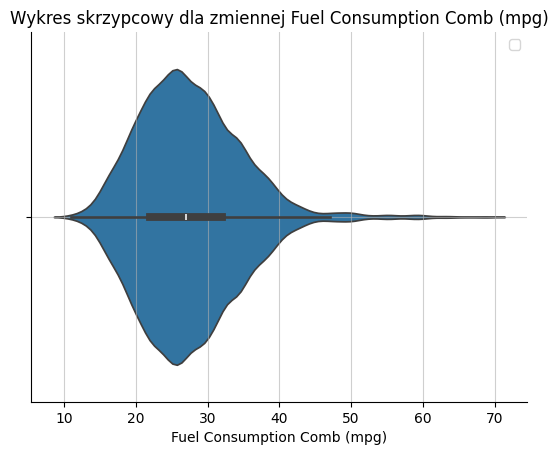

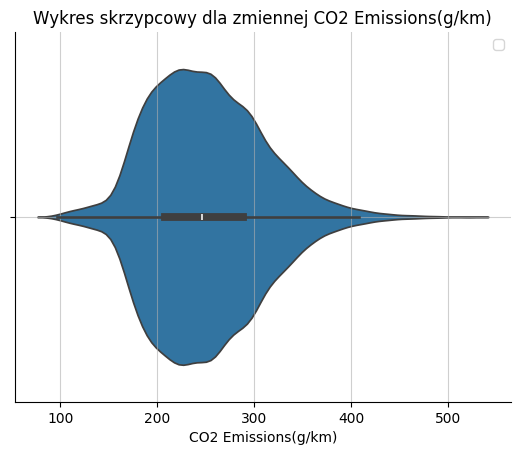

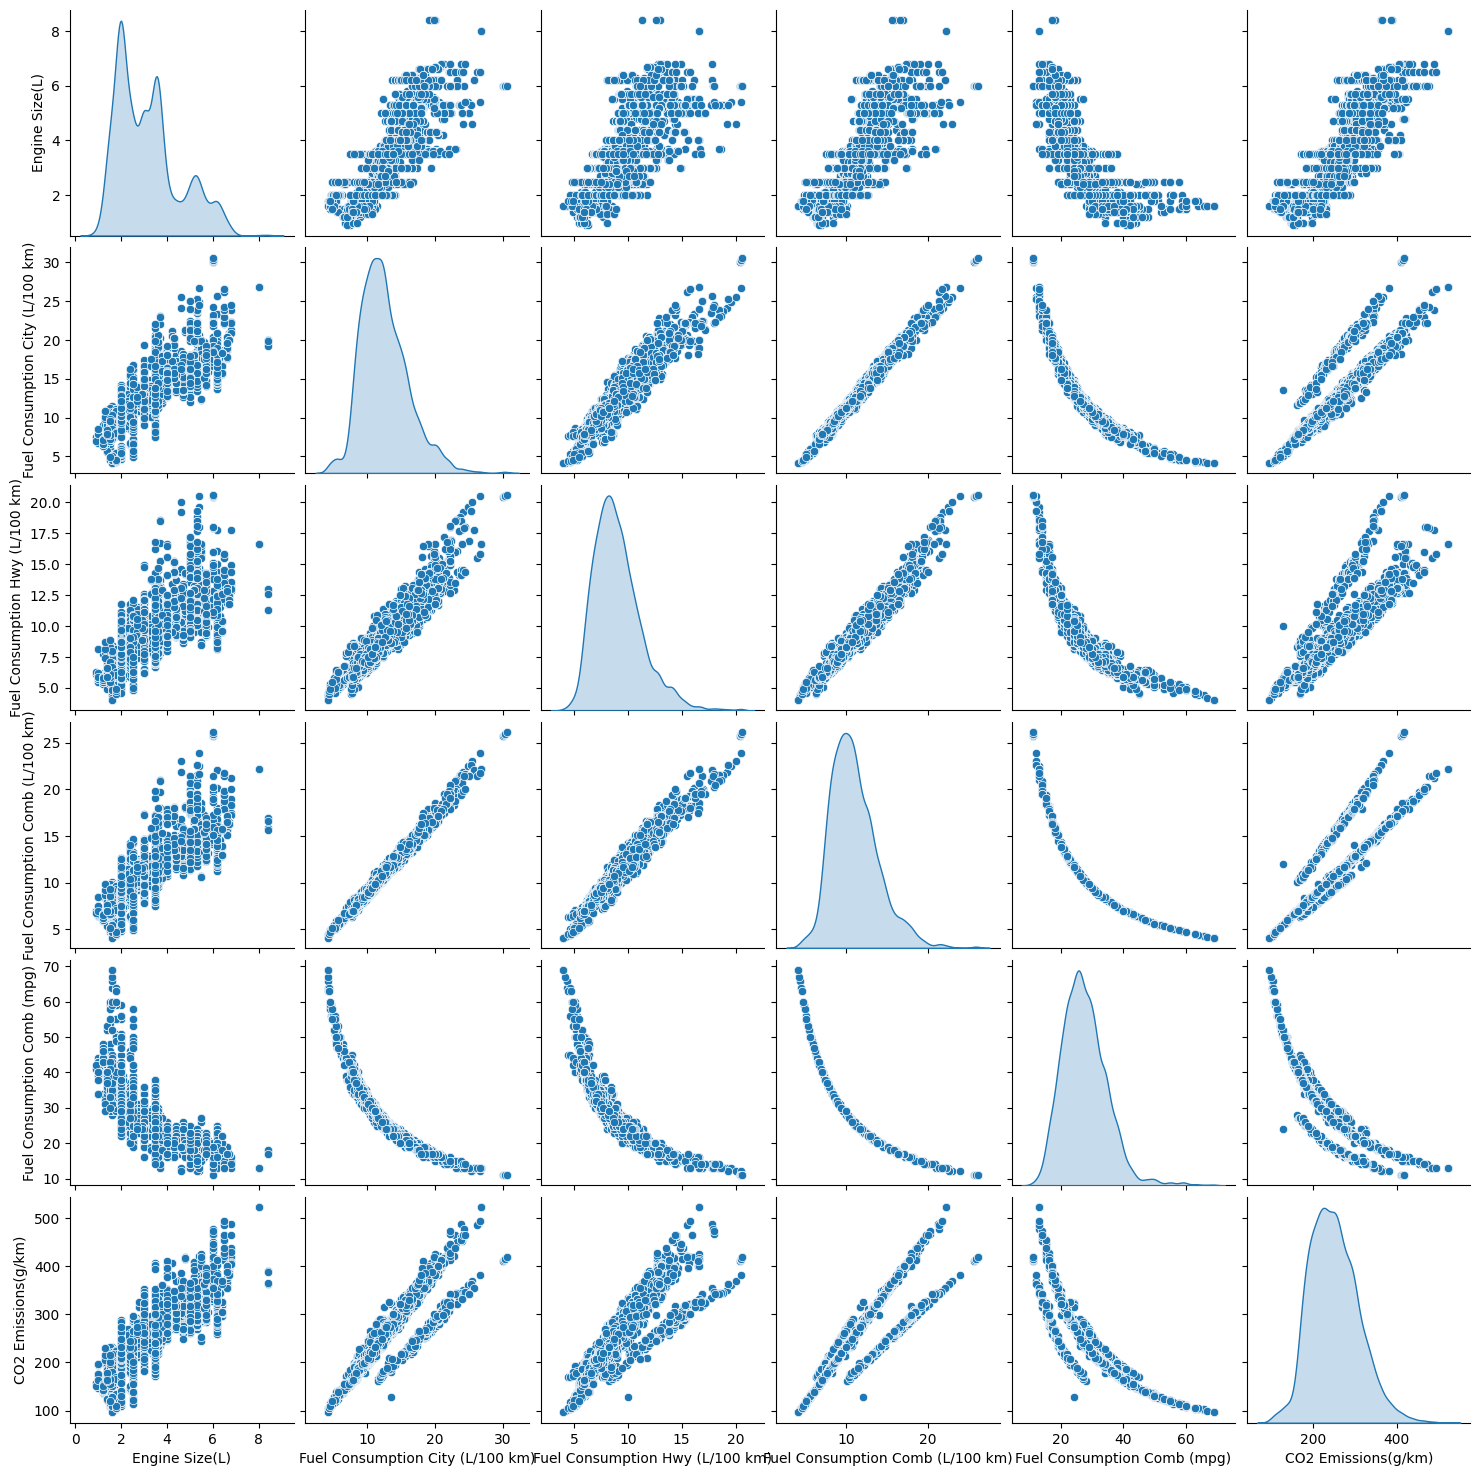

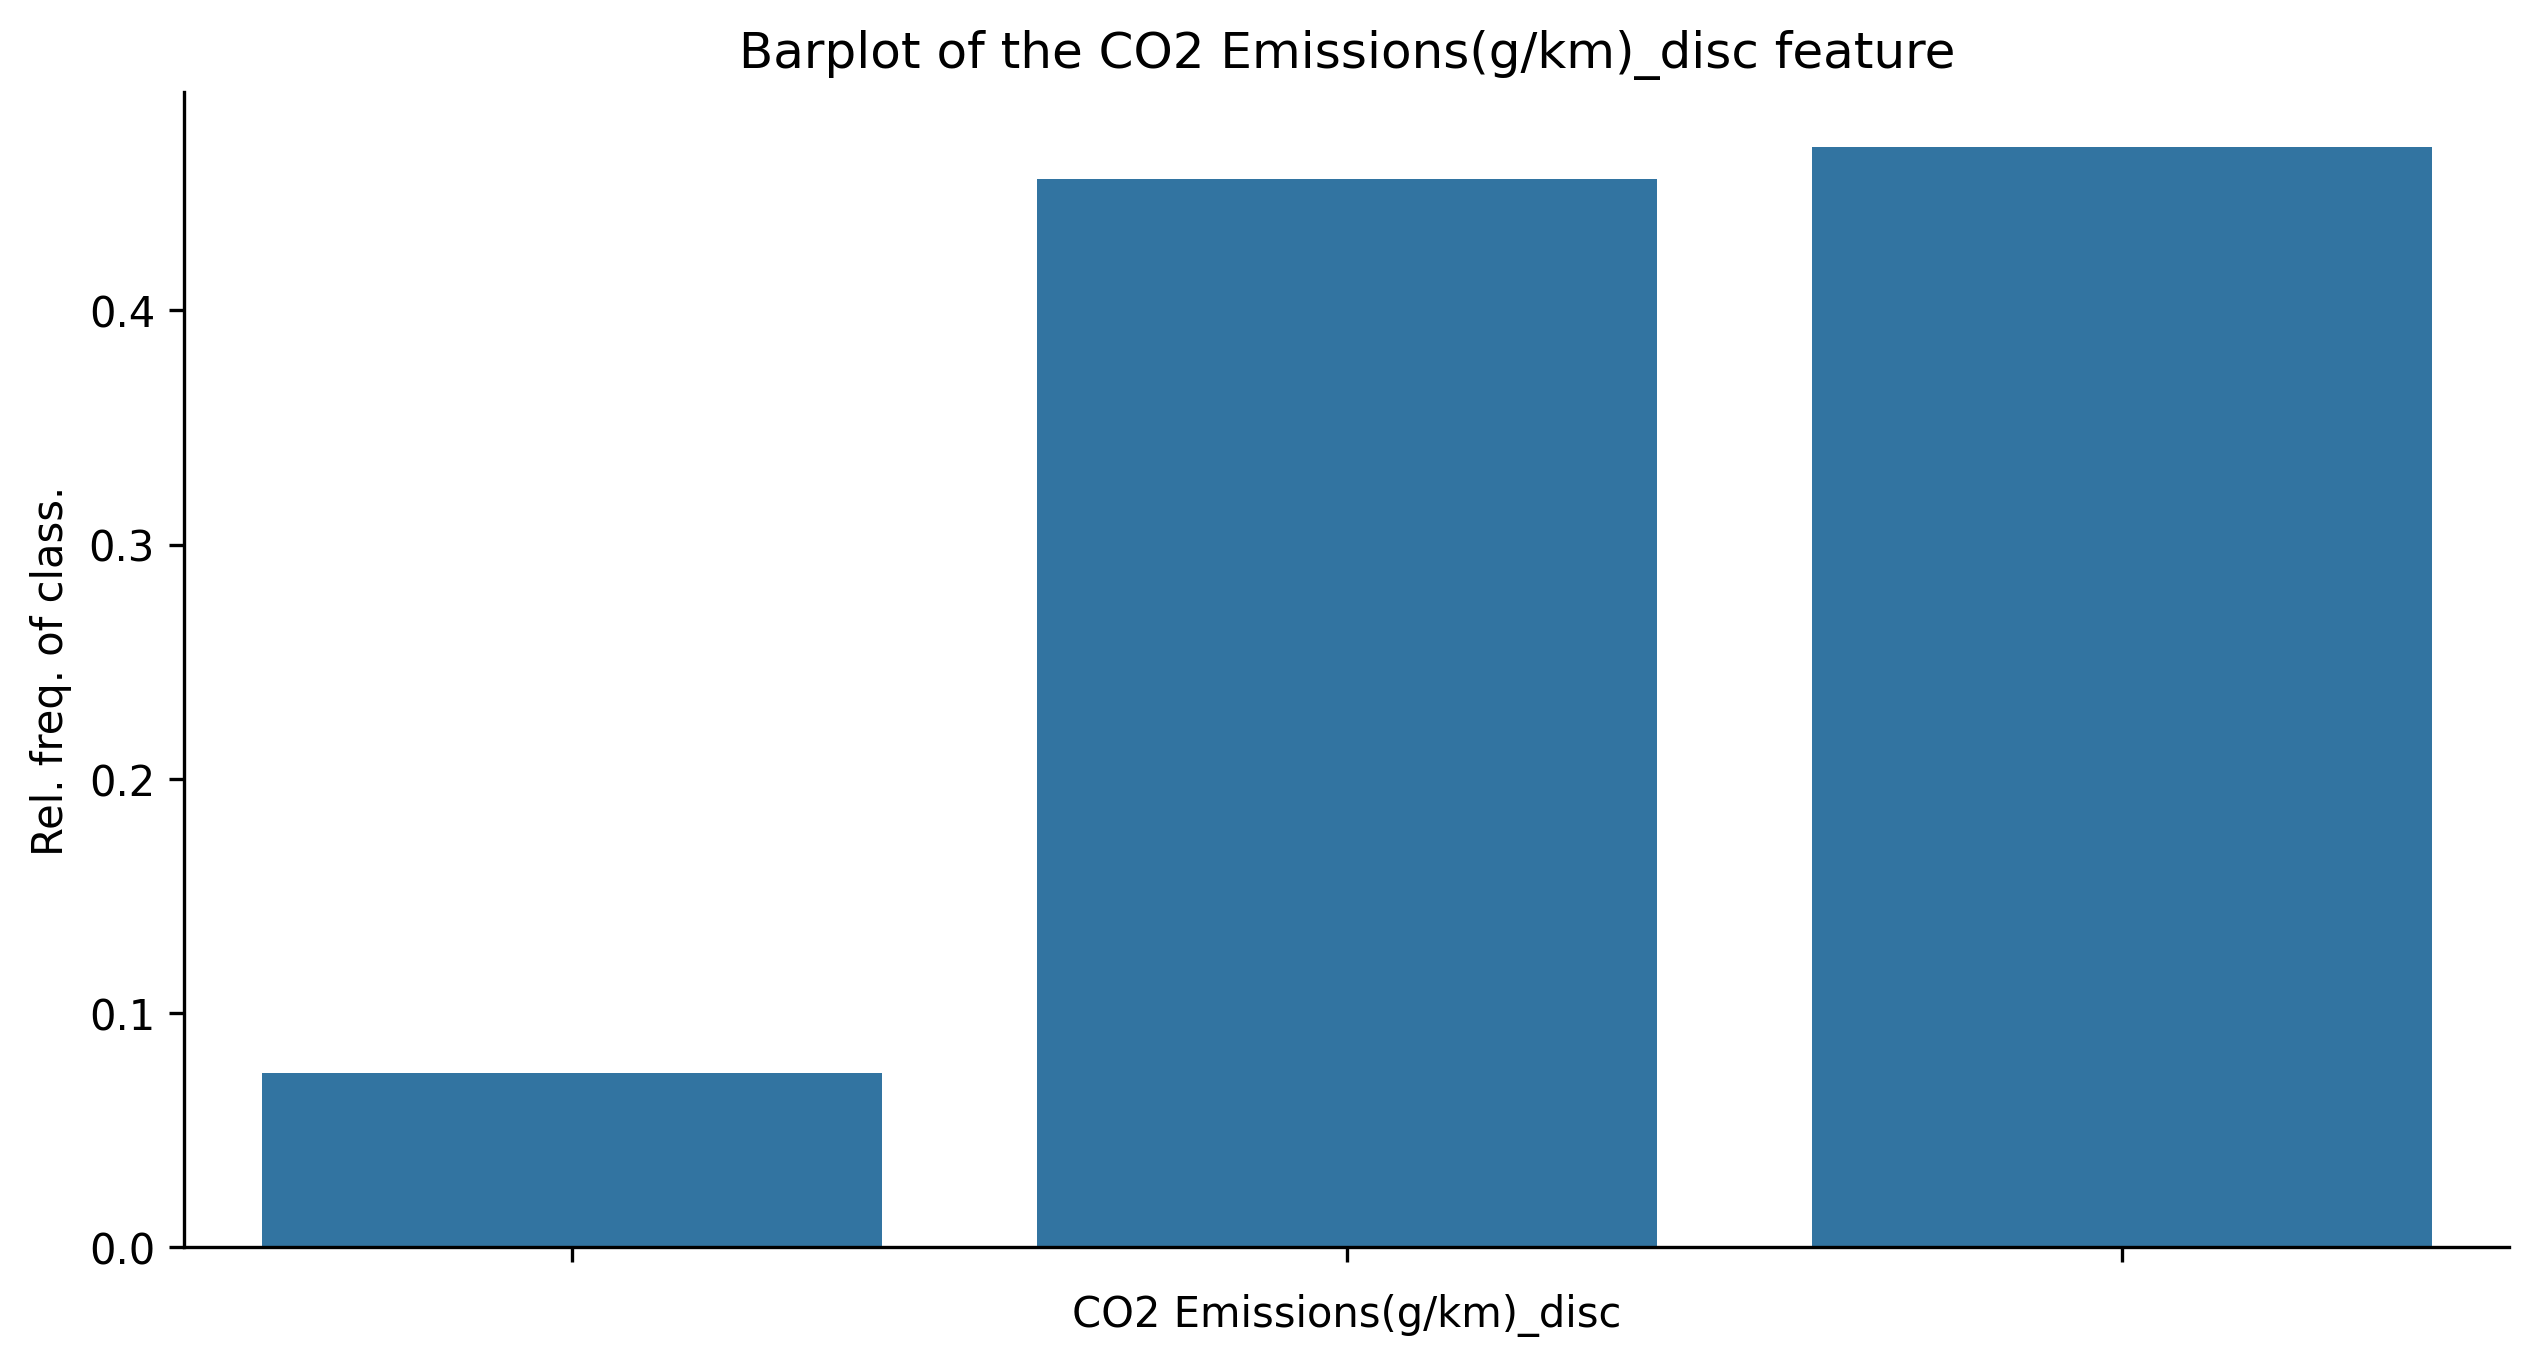

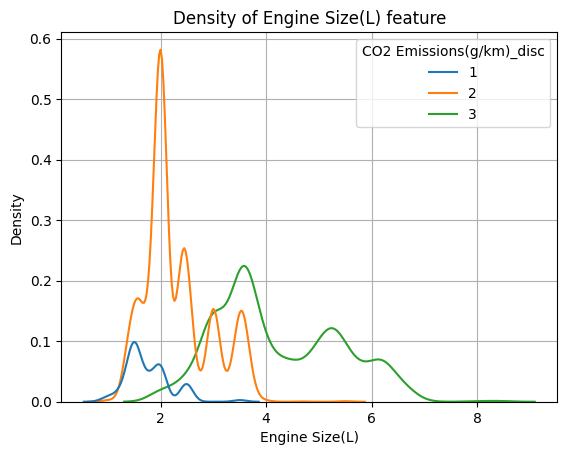

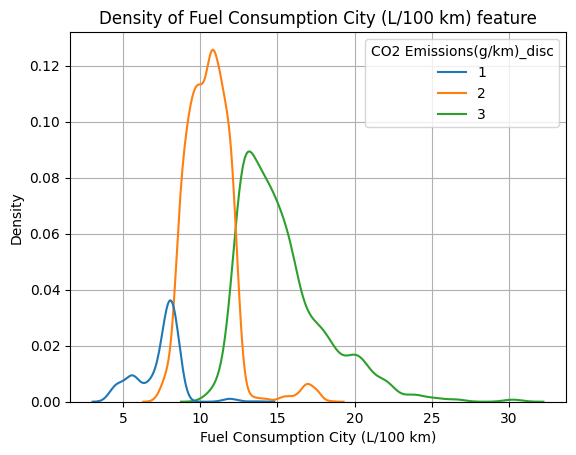

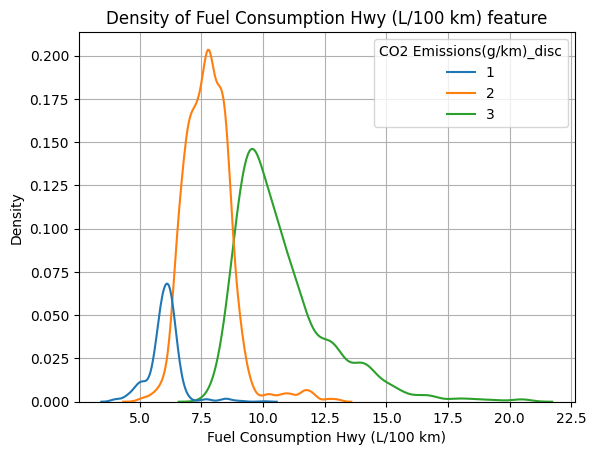

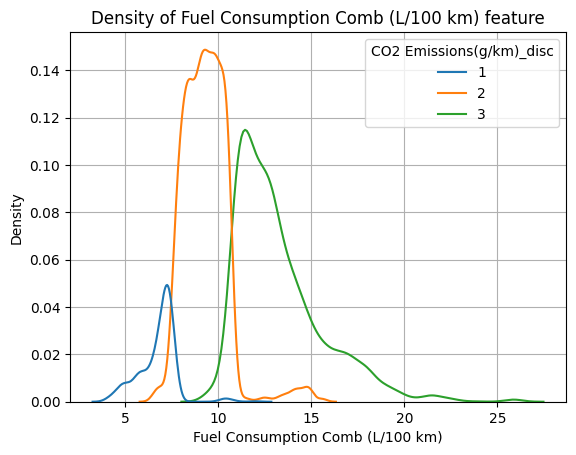

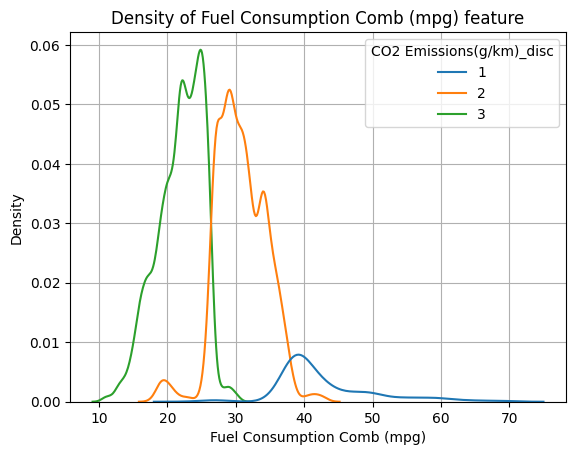

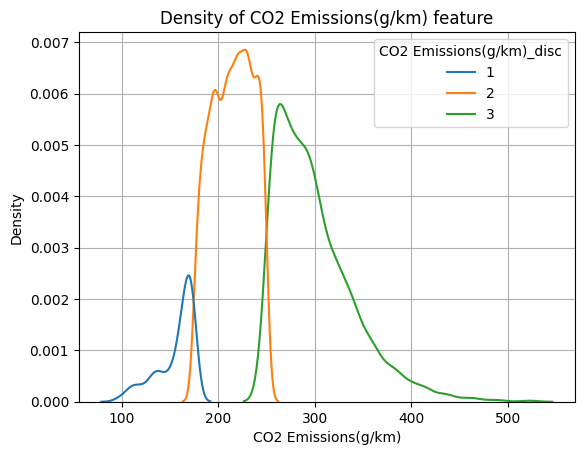

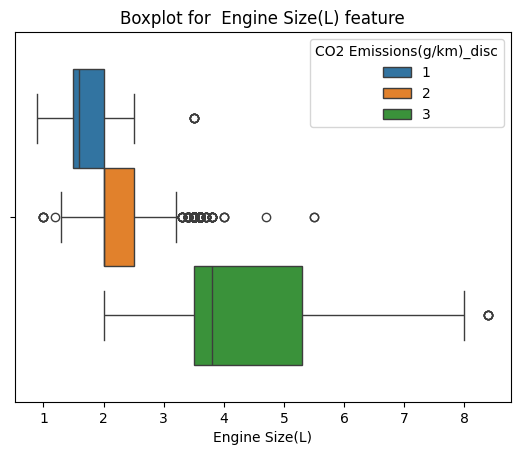

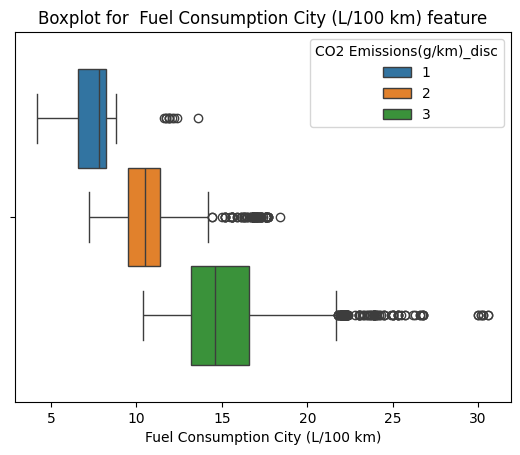

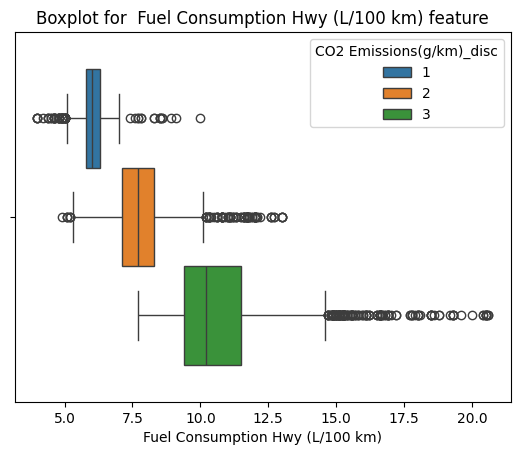

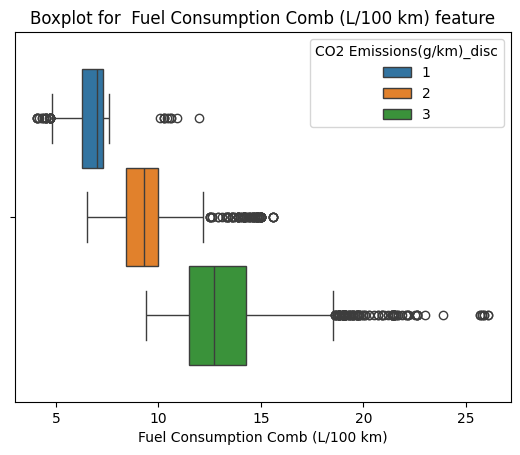

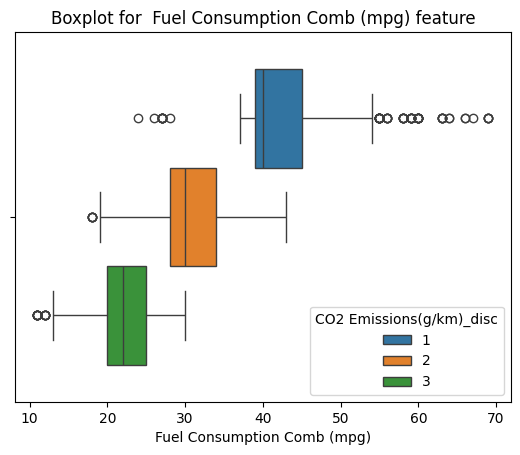

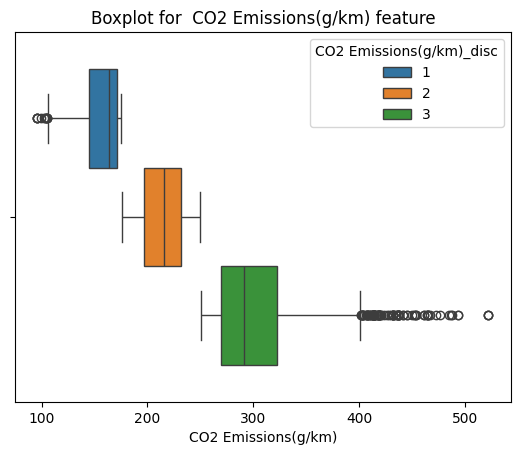

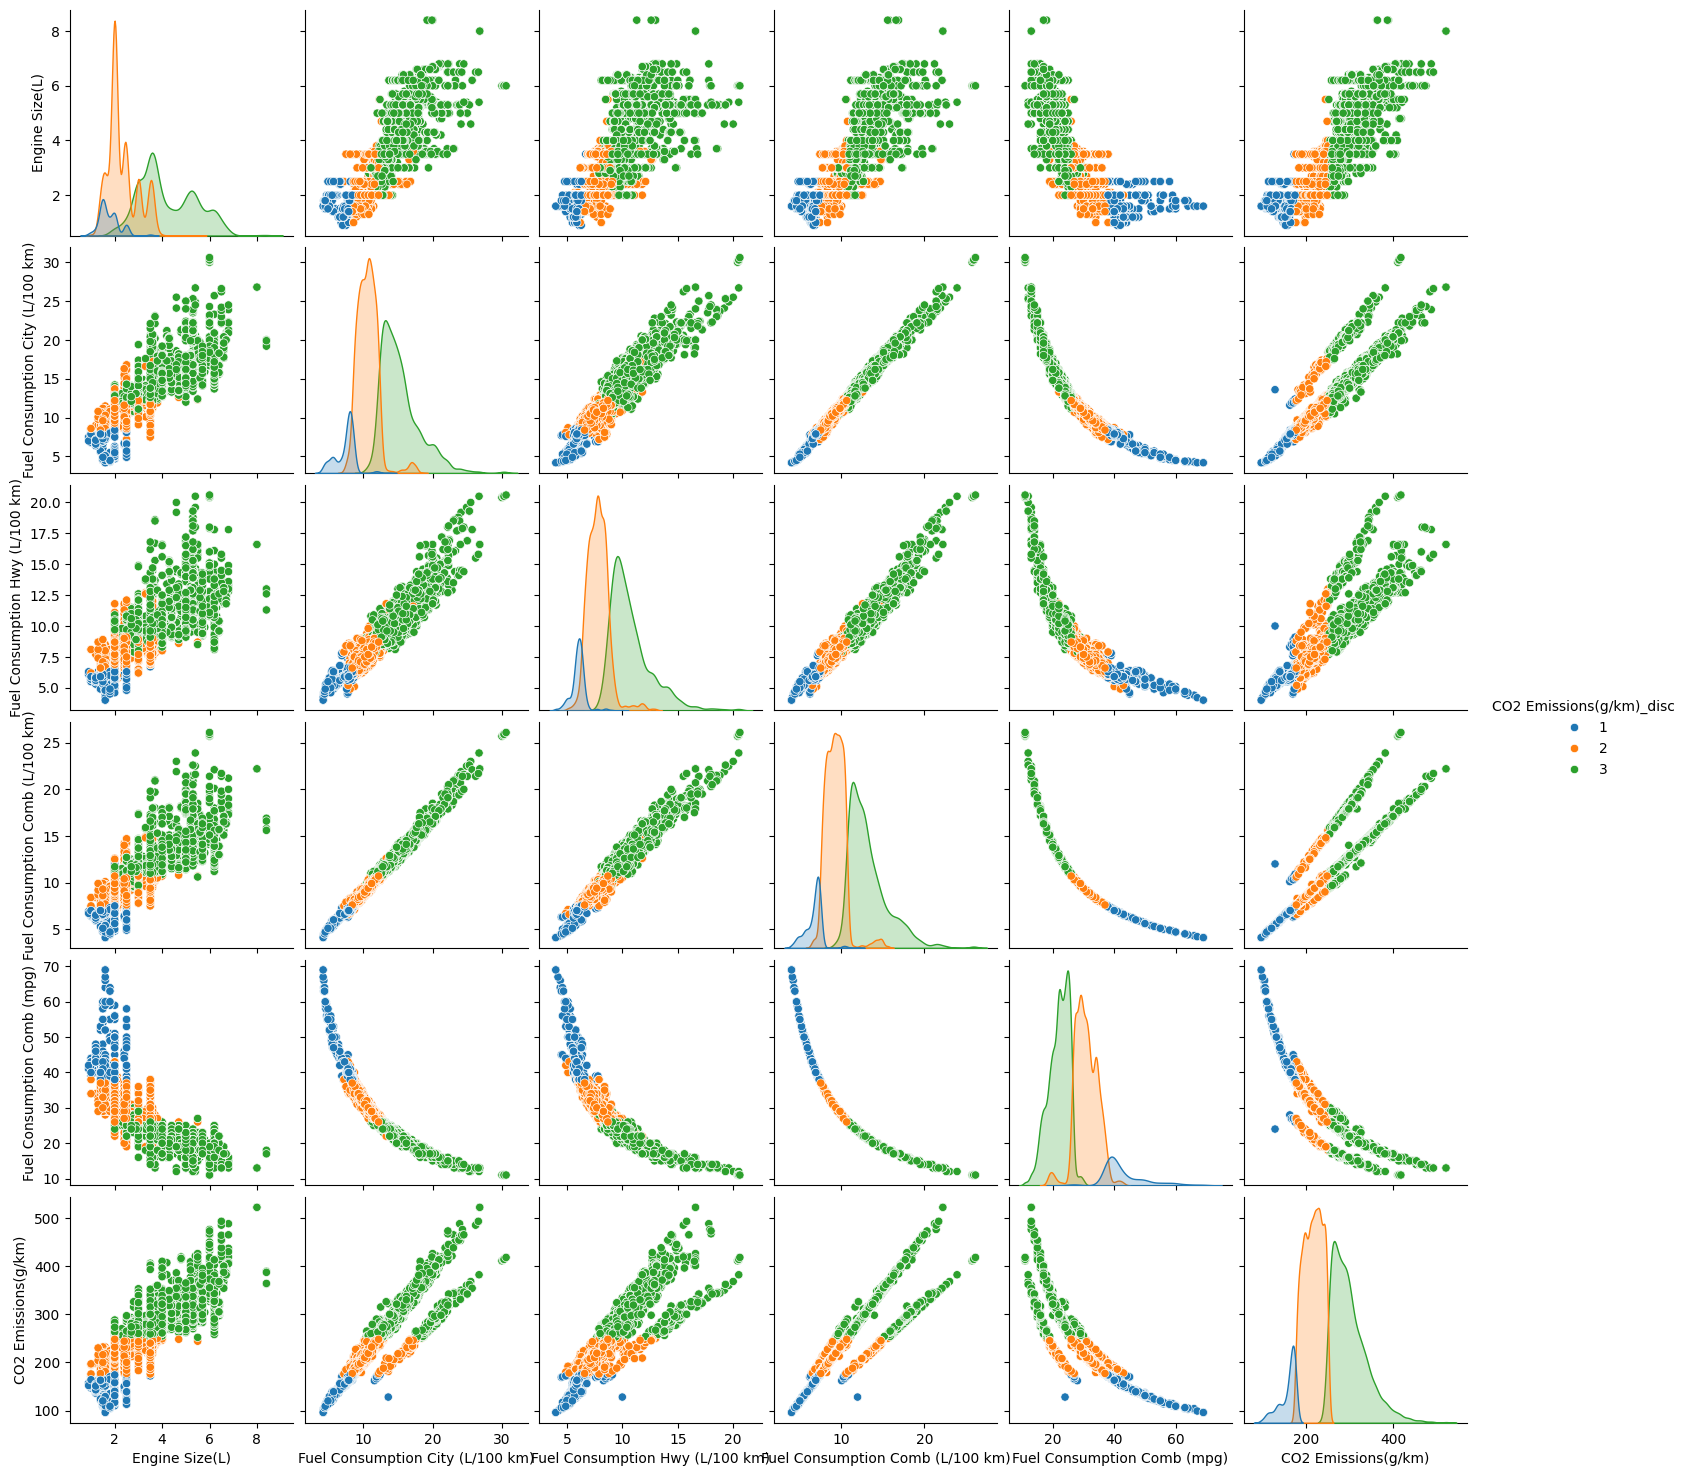

In [4]:

target_var: str = "CO2 Emissions(g/km)" #The target variable's name
file_name:str = "CO2Emission.csv" #The filename


n_splits:int = 35 # How many times we'll be learning each model.
train_size:float = 0.8 #The size of training set
test_size:float  = 1 - train_size #The size of testing set.

progi:tuple[int] = (-float("inf"), 175, 250, float("inf")) #Progi klas emisyjności dwutlenku węgla.

ModelComparator = ModelComparator(Filename = file_name, target_var = target_var, dtypes = dtypes, 
                                        Models = Models, Models_hipparams = Models_hipparams, 
                                        n_splits = n_splits, train_size  = train_size, test_size = test_size, 
                                        bins = progi, show_plots = True
                                        )

ModelComparator.descriptive_statistics()


### Training-the-models section.

In [5]:
ModelComparator.train_models()

0


c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.15667529304959152, -0.12513747307568207, -0.3079005949442485, -0.11995710536328098, -0.4285794899561871, -0.18742415654718417, -0.23092544620818636, -0.44836667260146823, -0.1793466690405873, -0.27447103504261766, -0.1511761910200667, -0.46504713050105934, -0.3291595815614968, -0.2666497370620617, -0.2729247070474676, -0.19298691110661625, -0.23275097221466082, -0.28874843030110886, -0.2798158963297748, -0.17212166515199193, -0.2468696861711226, -0.17577129360428623, -0.14546935763416302, -0.38045173758545614, -0.2585919864828905, -0.30165168032870776, -0.2128033241809476, -0.35691908150613927, -0.13800434996566746, -0.21771859861645051, -0.33615699251398706, -0.2494279895898981, -0.2005156717564551, -0.5926872232250616, -0.46731677370742736, -0.6130459134733788, -0.33108263345329575, -0.1671315676162189, -0.22347426

1


c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.15935369720403486, -0.12847505800032508, -0.30721254806210674, -0.11268007990012083, -0.4246110758911337, -0.18742415654718417, -0.23000724994277907, -0.4474217470567254, -0.1708878021816786, -0.28801463386630966, -0.15395029747212424, -0.45352857306020017, -0.3367859116653466, -0.2705886466138523, -0.2602234978505732, -0.19188726163626152, -0.2381436019466602, -0.29741280430383854, -0.27524094128159016, -0.24772538955552872, -0.17577129360428623, -0.14835021864128095, -0.24079463280721, -0.3776604178766199, -0.26902000356088096, -0.17816284970707005, -0.29383369916131774, -0.21080512665028248, -0.35691908150613927, -0.1828521472025519, -0.13490273254840532, -0.2225253279619214, -0.33991305314345943, -0.2494279895898981, -0.20878780630492244, -0.5887466782003317, -0.46001449988555815, -0.6239940270492393, -0.33235848

2


c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.15395029747212424, -0.12847505800032508, -0.3173766687864139, -0.4190931546650661, -0.18854983727819366, -0.23000724994277907, -0.433976811239281, -0.1793466690405873, -0.2805711362899705, -0.1553187714732687, -0.46276635593592996, -0.3374136585505521, -0.26902000356088096, -0.26505778410536596, -0.18966883723438396, -0.23275097221466082, -0.2952705473345481, -0.2729247070474676, -0.17456322916099565, -0.2494279895898981, -0.18515226462834192, -0.24428459204296693, -0.3776604178766199, -0.2618448437414934, -0.1828521472025519, -0.2945529993787768, -0.20777180121809574, -0.35334384197538593, -0.18400579995422325, -0.13490273254840532, -0.2225253279619214, -0.3329945798582901, -0.2594090248109679, -0.5826043233004337, -0.46686372777086577, -0.6239940270492393, -0.3272252283872836, -0.16067615720076558, -0.2206152039732

3


c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.14835021864128095, -0.12170839661809375, -0.3099555716673793, -0.1234348430855613, -0.42411241326942567, -0.18742415654718417, -0.22908537348776795, -0.4417097458476248, -0.17816284970707005, -0.2916651551388921, -0.16198782106385365, -0.4567830484414792, -0.3386656615851221, -0.26902000356088096, -0.2594090248109679, -0.18629167393421928, -0.23635972962353277, -0.2843172452034783, -0.2805711362899705, -0.16964496530777032, -0.2468696861711226, -0.13952930620359416, -0.25111904617387776, -0.3776604178766199, -0.25446744796165544, -0.18400579995422325, -0.30165168032870776, -0.21080512665028248, -0.36279952803895055, -0.19408033011792547, -0.1268172458618187, -0.21965391310862398, -0.3329945798582901, -0.2561252338847886, -0.20572473847593548, -0.5901826478411277, -0.4581707469755359, -0.6081941454038098, -0.328516062

4


c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.15802017001758134, -0.1268172458618187, -0.31267453226716696, -0.41656084655914, -0.19298691110661625, -0.22815977223388925, -0.4426668645123477, -0.17697111158472764, -0.2872789631019551, -0.15935369720403486, -0.45909354901211624, -0.3285160627024647, -0.26744216001871607, -0.2729247070474676, -0.18854983727819366, -0.23275097221466082, -0.3002453711295364, -0.2760086999313349, -0.1708878021816786, -0.2527987909617013, -0.18169116945072972, -0.13800434996566746, -0.24514931896664266, -0.38045173758545614, -0.264258211290845, -0.17577129360428623, -0.2967004372825619, -0.20878780630492244, -0.35987131608984296, -0.18400579995422325, -0.1301117489252866, -0.21868839672858958, -0.3323584864792672, -0.2561252338847886, -0.19945753417640688, -0.5912573364055572, -0.4636800120197544, -0.6202524101612324, -0.3367859116653

5


c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.15935369720403486, -0.13490273254840532, -0.31131802030732464, -0.12513747307568207, -0.4195977823670269, -0.19078127397114517, -0.2345622911452087, -0.44123040794641905, -0.1671315676162189, -0.2894803666599244, -0.14976987030483063, -0.4618508924163727, -0.3323584864792672, -0.2658549521732795, -0.27214824827056316, -0.21771859861645051, -0.27829926783665, -0.17212166515199193, -0.2468696861711226, -0.1828521472025519, -0.13952930620359416, -0.25111904617387776, -0.37989511440867846, -0.2594090248109679, -0.17456322916099565, -0.3002453711295364, -0.21180658181995096, -0.36221577942584904, -0.18515226462834192, -0.12847505800032508, -0.2167444612978638, -0.33615699251398706, -0.2577723584734359, -0.2046935302856007, -0.5887466782003317, -0.4636800120197544, -0.6307401044783224, -0.33991305314345943, -0.165860586679

6


c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.15802017001758134, -0.12513747307568207, -0.31469833677527015, -0.1234348430855613, -0.42161025330056495, -0.1793466690405873, -0.2318400060098772, -0.4507203196004833, -0.1683929558326733, -0.2916651551388921, -0.4613924795069703, -0.33615699251398706, -0.27214824827056316, -0.2626517635086752, -0.1951676233879299, -0.3030514636254917, -0.2666497370620617, -0.16964496530777032, -0.2494279895898981, -0.1511761910200667, -0.23365838685371368, -0.3731508780494343, -0.18052272537318917, -0.2945529993787768, -0.20979889118351344, -0.35691908150613927, -0.17816284970707005, -0.13490273254840532, -0.21576592600105154, -0.3348956109829284, -0.2536344917236374, -0.2005156717564551, -0.5847795803630765, -0.45955425514812753, -0.6229758147412282, -0.3336294604725564, -0.1671315676162189, -0.22061520397320952, -0.23092544620818

7


c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.15667529304959152, -0.12847505800032508, -0.31131802030732464, -0.11637548610733041, -0.4160525353916948, -0.18742415654718417, -0.23991421072656197, -0.4450506559238428, -0.17816284970707005, -0.2902104570165833, -0.16198782106385365, -0.45770864827301505, -0.3348956109829284, -0.27214824827056316, -0.2666497370620617, -0.19624889273344384, -0.22723040066331415, -0.2916651551388921, -0.2760086999313349, -0.1645797907807484, -0.2468696861711226, -0.18052272537318917, -0.14976987030483063, -0.2494279895898981, -0.3776604178766199, -0.17577129360428623, -0.2988324438950584, -0.2046935302856007, -0.35334384197538593, -0.18629167393421928, -0.13800434996566746, -0.21868839672858958, -0.3317211733588607, -0.25111904617387776, -0.20878780630492244, -0.5763965162670465, -0.4718233078075077, -0.6250105805774463, -0.332358486

8


c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.14546935763416302, -0.13172810591747966, -0.31670920922788326, -0.1268172458618187, -0.4195977823670269, -0.18742415654718417, -0.23365838685371368, -0.44600060504293326, -0.17334674584457696, -0.2858019406521143, -0.1511761910200667, -0.45955425514812753, -0.3374136585505521, -0.26902000356088096, -0.26744216001871607, -0.18854983727819366, -0.2354627255161623, -0.2931126337819881, -0.2813243487493664, -0.16067615720076558, -0.24428459204296693, -0.18169116945072972, -0.14253027976565605, -0.2425458895738679, -0.3708755466032024, -0.2585919864828905, -0.1793466690405873, -0.29741280430383854, -0.21576592600105154, -0.3551359608692934, -0.18515226462834192, -0.22441919468927016, -0.33552689450450734, -0.20156825469342227, -0.5926872232250616, -0.46686372777086577, -0.6088896220694605, -0.3317211733588607, -0.16328894

9


c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.1553187714732687, -0.1301117489252866, -0.31267453226716696, -0.4190931546650661, -0.19078127397114517, -0.2318400060098772, -0.4474217470567254, -0.1708878021816786, -0.2967004372825619, -0.15667529304959152, -0.468221550495851, -0.3317211733588607, -0.2602234978505732, -0.264258211290845, -0.18966883723438396, -0.23275097221466082, -0.2865414035714988, -0.28207554994976974, -0.15935369720403486, -0.2434167932361875, -0.16964496530777032, -0.14253027976565605, -0.24772538955552872, -0.3782203298488238, -0.2658549521732795, -0.17212166515199193, -0.3030514636254917, -0.21080512665028248, -0.3491264583219913, -0.17697111158472764, -0.1268172458618187, -0.2225253279619214, -0.33615699251398706, -0.2634562118349593, -0.2046935302856007, -0.5771303122564326, -0.45585556921361714, -0.6277133416420556, -0.1683929558326733,

10


KeyboardInterrupt: 

### Visualization the results section.

In [36]:
ModelComparator.compare_models()